# SuperKart Project

## Context:

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of actions. Forecasting helps an organization to plan its sales operations by regions and provide valuable insights to the supply chain team regarding the procurement of goods and materials.
An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective:

SuperKartKart is an organization which owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.


## Data Description:

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number
* Product_Weight - weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular and no sugar
* Product_Allocated_Area - ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, breads, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - year in which the store was established
* Store_Size - size of the store depending on sq. feet like high, medium and low
* Store_Location_City_Type - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store

The main objective is to build a predictive model that can accurately forecast the total sales revenue of different stores for the upcoming quarter. This will aid SuperKart in making informed decisions about sales operations and inventory management across different cities and store types.



## Importing necessary libraries and data

In [1]:

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV




## Data Overview

- Observations
- Sanity checks

In [2]:
import pandas as pd

# Load the dataset into a pandas DataFrame
file_path = "/content/SuperKart.csv"
data = pd.read_csv(file_path)



In [3]:
# Display the first five rows of the loaded dataset
print(data.head())

  Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0     FD6114        12.66000             Low Sugar                 0.02700   
1     FD7839        16.54000             Low Sugar                 0.14400   
2     FD5075        14.28000               Regular                 0.03100   
3     FD8233        12.10000             Low Sugar                 0.11200   
4     NC1180         9.57000              No Sugar                 0.01000   

         Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
0        Frozen Foods    117.08000   OUT004                      2009   
1               Dairy    171.43000   OUT003                      1999   
2              Canned    162.08000   OUT001                      1987   
3        Baking Goods    186.31000   OUT001                      1987   
4  Health and Hygiene    123.67000   OUT002                      1998   

  Store_Size Store_Location_City_Type          Store_Type  \
0     Medium                   

###Check the data types of the columns for the dataset

In [4]:
# Display basic information about the dataset
print("/content/SuperKart.csv")
print(data.info())

/content/SuperKart.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB
None


In [5]:
data.info

<bound method DataFrame.info of      Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0        FD6114        12.66000             Low Sugar                 0.02700   
1        FD7839        16.54000             Low Sugar                 0.14400   
2        FD5075        14.28000               Regular                 0.03100   
3        FD8233        12.10000             Low Sugar                 0.11200   
4        NC1180         9.57000              No Sugar                 0.01000   
...         ...             ...                   ...                     ...   
8758     NC7546        14.80000              No Sugar                 0.01600   
8759      NC584        14.06000              No Sugar                 0.14200   
8760     NC2471        13.48000              No Sugar                 0.01700   
8761     NC7187        13.89000              No Sugar                 0.19300   
8762      FD306        14.73000             Low Sugar                 0.17700

In [6]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())


Summary Statistics for Numerical Columns:
       Product_Weight  Product_Allocated_Area  Product_MRP  \
count      8763.00000              8763.00000   8763.00000   
mean         12.65379                 0.06879    147.03254   
std           2.21732                 0.04820     30.69411   
min           4.00000                 0.00400     31.00000   
25%          11.15000                 0.03100    126.16000   
50%          12.66000                 0.05600    146.74000   
75%          14.18000                 0.09600    167.58500   
max          22.00000                 0.29800    266.00000   

       Store_Establishment_Year  Product_Store_Sales_Total  
count                8763.00000                 8763.00000  
mean                 2002.03275                 3464.00364  
std                     8.38838                 1065.63049  
min                  1987.00000                   33.00000  
25%                  1998.00000                 2761.71500  
50%                  2009.00000 

In [7]:
# Checking for missing values in the dataset
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64


In [8]:
# Check for duplicate entries in the data
duplicate_entries = data[data.duplicated()]
print("Duplicate Entries:")
print(duplicate_entries)

Duplicate Entries:
Empty DataFrame
Columns: [Product_Id, Product_Weight, Product_Sugar_Content, Product_Allocated_Area, Product_Type, Product_MRP, Store_Id, Store_Establishment_Year, Store_Size, Store_Location_City_Type, Store_Type, Product_Store_Sales_Total]
Index: []


In [9]:
# Checking for duplicate rows
print("\nDuplicate Rows:")
print(data.duplicated().sum())


Duplicate Rows:
0


OBSERVATION: # Data seems clean with no missing values or duplicate rows.

Products have varying prices (Product_MRP) and weights.

###**Understand the shape of the dataset**

View the first and last 5 rows of the dataset

In [10]:
# View the first 5 rows of the dataset
print("First 5 rows:")
print(data.head())

First 5 rows:
  Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0     FD6114        12.66000             Low Sugar                 0.02700   
1     FD7839        16.54000             Low Sugar                 0.14400   
2     FD5075        14.28000               Regular                 0.03100   
3     FD8233        12.10000             Low Sugar                 0.11200   
4     NC1180         9.57000              No Sugar                 0.01000   

         Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
0        Frozen Foods    117.08000   OUT004                      2009   
1               Dairy    171.43000   OUT003                      1999   
2              Canned    162.08000   OUT001                      1987   
3        Baking Goods    186.31000   OUT001                      1987   
4  Health and Hygiene    123.67000   OUT002                      1998   

  Store_Size Store_Location_City_Type          Store_Type  \
0     Medium     

In [11]:
# View the last 5 rows of the dataset
print("\nLast 5 rows:")
print(data.tail())


Last 5 rows:
     Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
8758     NC7546        14.80000              No Sugar                 0.01600   
8759      NC584        14.06000              No Sugar                 0.14200   
8760     NC2471        13.48000              No Sugar                 0.01700   
8761     NC7187        13.89000              No Sugar                 0.19300   
8762      FD306        14.73000             Low Sugar                 0.17700   

            Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
8758  Health and Hygiene    140.53000   OUT004                      2009   
8759           Household    144.51000   OUT004                      2009   
8760  Health and Hygiene     88.58000   OUT001                      1987   
8761           Household    168.44000   OUT001                      1987   
8762         Snack Foods    224.93000   OUT002                      1998   

     Store_Size Store_Location_City_Type  

In [12]:
data.head

<bound method NDFrame.head of      Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0        FD6114        12.66000             Low Sugar                 0.02700   
1        FD7839        16.54000             Low Sugar                 0.14400   
2        FD5075        14.28000               Regular                 0.03100   
3        FD8233        12.10000             Low Sugar                 0.11200   
4        NC1180         9.57000              No Sugar                 0.01000   
...         ...             ...                   ...                     ...   
8758     NC7546        14.80000              No Sugar                 0.01600   
8759      NC584        14.06000              No Sugar                 0.14200   
8760     NC2471        13.48000              No Sugar                 0.01700   
8761     NC7187        13.89000              No Sugar                 0.19300   
8762      FD306        14.73000             Low Sugar                 0.17700  

The dataset contains product and store attributes, including product type, weight, and store details.

The target variable is Product_Store_Sales_Total, representing sales revenue.

Data seems clean with no missing values or duplicate rows.

Products have varying prices (Product_MRP) and weights.

Stores vary in size (Store_Size) and city type (Store_Location_City_Type).

Different types of stores (Store_Type) are present.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
- Different varieties of products are available at stores. A store needs to plan its inventory appropriately which is well aligned to the supply and demand characteristics. Which product type is contributing the most to the revenue of the company (SuperKart)?
- Location may have a high impact on the revenue of a store. Find out the type of stores and locations that are having a high impact on the revenue of the company.
- Nowadays many customers prefer products that have low sugar content in them. How many items have been sold in each of the 16 product types that have low sugar content in them?
- Which product type has been sold the most number of times in each of the stores? Which product type is contributing the most to the revenue of the individual stores?
- There are some stores of a company that generally sell only premium items having higher prices than others. Which store has sold more costly goods than others?


###Let's check the statistical summary of the data.

In [13]:
# Print the statistical summary of the data
print(data.describe())

       Product_Weight  Product_Allocated_Area  Product_MRP  \
count      8763.00000              8763.00000   8763.00000   
mean         12.65379                 0.06879    147.03254   
std           2.21732                 0.04820     30.69411   
min           4.00000                 0.00400     31.00000   
25%          11.15000                 0.03100    126.16000   
50%          12.66000                 0.05600    146.74000   
75%          14.18000                 0.09600    167.58500   
max          22.00000                 0.29800    266.00000   

       Store_Establishment_Year  Product_Store_Sales_Total  
count                8763.00000                 8763.00000  
mean                 2002.03275                 3464.00364  
std                     8.38838                 1065.63049  
min                  1987.00000                   33.00000  
25%                  1998.00000                 2761.71500  
50%                  2009.00000                 3452.34000  
75%           

**Observations: **

Product_Weight:  The mean weight is around 12.65 units, with a minimum of 4 units and a maximum of 22 units. The data's distribution has a standard deviation of approximately 2.22, indicating that weights vary by this amount around the mean.

Product_Allocated_Area: The mean allocated area is about 0.06879, with values ranging from 0.004 to 0.298. The standard deviation is approximately 0.04820, which suggests some variability around the mean.

Product_MRP: The average MRP is approximately 147.03 units, with the lowest MRP being 31 units and the highest being 266 units. The standard deviation of around 30.69 indicates variability in the prices.

Store_Establishment_Year:  The mean year is approximately 2002, with the earliest year being 1987 and the latest being 2009. The standard deviation of about 8.39 shows some variability in store establishment years.

Product_Store_Sales_Total: The summary shows an average total sales of approximately 3464.00 units, with a minimum of 33 units and a maximum of 8000 units. The standard deviation is around 1065.63, indicating substantial variability in sales totals.

In [14]:
# Making a list of all categorical variables
cat_cols = [col for col in data.columns if data[col].dtype == "object"]

# Printing the count of each unique value in each categorical column
for col in cat_cols:
    print(data[col].value_counts())
    print("-" * 50)

FD6114    1
FD8349    1
DR3530    1
NC5926    1
FD3575    1
         ..
FD2396    1
FD681     1
FD8077    1
DR3118    1
FD306     1
Name: Product_Id, Length: 8763, dtype: int64
--------------------------------------------------
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64
--------------------------------------------------
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64
--------------------------------------------------
OUT004    4676
OUT001    1586
OUT003    134

Different varieties of products are available at stores. A store needs to plan its inventory appropriately which is well aligned to the supply and demand characteristics. Which product type is contributing the most to the revenue of the company (SuperKart)?

Here are observations for each categorical column:

Product_Id: Each value in this column appears to be unique.

Product_Sugar_Content: The distribution of sugar content is as follows:

"Low Sugar": 4885 occurrences
"Regular": 2251 occurrences
"No Sugar": 1519 occurrences
"reg": 108 occurrences

Product_Type:
product types is as follows (showing a few examples):

"Fruits and Vegetables": 1249 occurrences
"Snack Foods": 1149 occurrences
"Frozen Foods": 811 occurrences

Store_Id: This column indicates the IDs of different stores. The distribution of store IDs is as follows:

"OUT004": 4676 occurrences
"OUT001": 1586 occurrences
"OUT003": 1349 occurrences
"OUT002": 1152 occurrences
Store_Size: This column represents the size of stores. The distribution of store sizes is as follows:

"Medium": 6025 occurrences
"High": 1586 occurrences
"Small": 1152 occurrences
Store_Location_City_Type: This column indicates the city type of store locations. The distribution of city types is as follows:

"Tier 2": 6262 occurrences
"Tier 1": 1349 occurrences
"Tier 3": 1152 occurrences
Store_Type: This column represents the type of stores. The distribution of store types is as follows:

"Supermarket Type2": 4676 occurrences
"Supermarket Type1": 1586 occurrences
"Departmental Store": 1349 occurrences
"Food Mart": 1152 occurrences

In [15]:
# Question 1
product_revenue = data.groupby('Product_Type')['Product_Store_Sales_Total'].sum()
top_product_type = product_revenue.idxmax()
print("Product Type contributing the most to revenue:", top_product_type)

Product Type contributing the most to revenue: Fruits and Vegetables


Location may have a high impact on the revenue of a store. Find out the type of stores and locations that are having a high impact on the revenue of the company.

In [16]:
store_location_revenue = data.groupby(['Store_Type', 'Store_Location_City_Type'])['Product_Store_Sales_Total'].sum()
store_location_revenue

Store_Type          Store_Location_City_Type
Departmental Store  Tier 1                      6673457.57000
Food Mart           Tier 3                      2030909.72000
Supermarket Type1   Tier 2                      6223113.18000
Supermarket Type2   Tier 2                     15427583.43000
Name: Product_Store_Sales_Total, dtype: float64

OBSERVATION: It appears that "Supermarket Type2" stores in "Tier 2" cities have the highest total sales, followed by "Supermarket Type1" stores in the same city type. Meanwhile, departmental stores in Tier 1 cities have the lowest total sales among the listed combinations.

In [17]:
# Question 2
store_location_revenue = data.groupby(['Store_Type', 'Store_Location_City_Type'])['Product_Store_Sales_Total'].sum()
top_store_location = store_location_revenue.idxmax()
print("Store Type and Location with highest revenue:", top_store_location)

Store Type and Location with highest revenue: ('Supermarket Type2', 'Tier 2')


Nowadays many customers prefer products that have low sugar content in them. How many items have been sold in each of the 16 product types that have low sugar content in them?

In [18]:
# Question 3
low_sugar_product_count = data[data['Product_Sugar_Content'] == 'Low Sugar'].groupby('Product_Type')['Product_Id'].count()
print("Items sold in each Low Sugar product type:")
print(low_sugar_product_count)

Items sold in each Low Sugar product type:
Product_Type
Baking Goods             462
Breads                   148
Breakfast                 65
Canned                   402
Dairy                    590
Frozen Foods             531
Fruits and Vegetables    864
Hard Drinks              128
Meat                     377
Seafood                   47
Snack Foods              804
Soft Drinks              370
Starchy Foods             97
Name: Product_Id, dtype: int64


Which product type has been sold the most number of times in each of the stores? Which product type is contributing the most to the revenue of the individual stores?

In [19]:
# Question 4
store_product_counts = data.groupby(['Store_Id', 'Product_Type'])['Product_Id'].count()
store_product_revenue = data.groupby(['Store_Id', 'Product_Type'])['Product_Store_Sales_Total'].sum()
store_product_revenue

Store_Id  Product_Type         
OUT001    Baking Goods             525131.04000
          Breads                   121274.09000
          Breakfast                 38161.10000
          Canned                   449016.38000
          Dairy                    598767.62000
          Frozen Foods             558556.81000
          Fruits and Vegetables    792992.59000
          Hard Drinks              152920.74000
          Health and Hygiene       435005.31000
          Household                531371.38000
          Meat                     505867.28000
          Others                   123977.09000
          Seafood                   52936.84000
          Snack Foods              806142.24000
          Soft Drinks              410548.69000
          Starchy Foods            120443.98000
OUT002    Baking Goods             169860.50000
          Breads                    43419.47000
          Breakfast                 23396.10000
          Canned                   151467.66000
        

In [20]:
store_product_counts

Store_Id  Product_Type         
OUT001    Baking Goods             136
          Breads                    30
          Breakfast                 10
          Canned                   119
          Dairy                    150
          Frozen Foods             142
          Fruits and Vegetables    199
          Hard Drinks               38
          Health and Hygiene       114
          Household                134
          Meat                     130
          Others                    31
          Seafood                   13
          Snack Foods              202
          Soft Drinks              106
          Starchy Foods             32
OUT002    Baking Goods              96
          Breads                    23
          Breakfast                 15
          Canned                    88
          Dairy                    104
          Frozen Foods             101
          Fruits and Vegetables    168
          Hard Drinks               30
          Health and Hygiene    

There are some stores of a company that generally sell only premium items having higher prices than others. Which store has sold more costly goods than others?

In [21]:
# Question 5
store_avg_price = data.groupby('Store_Id')['Product_MRP'].mean()
store_highest_avg_price = store_avg_price.idxmax()
print("Store with the highest average product price:", store_highest_avg_price)


Store with the highest average product price: OUT003


OBSERVATION: OUT003 has higher avg price than others.

In [22]:
# Checking the number of unique values in the "ID" column
num_unique_values = data["Product_Id"].nunique()
print("Number of unique values in the 'ID' column:", num_unique_values)

Number of unique values in the 'ID' column: 8763


Observation: There are 8763 products in teh data.

In [23]:
# Checking the number of unique values in the "ID" column
num_unique_values = data["Store_Id"].nunique()
print("Number of unique values in the 'ID' column:", num_unique_values)

Number of unique values in the 'ID' column: 4


OBSERVATION: There are  4 stores in the dataset.

In [24]:
# Checking the number of unique values in the "ID" column
num_unique_values = data["Store_Type"].nunique()
print("Number of unique values in the 'ID' column:", num_unique_values)
num_unique_values

Number of unique values in the 'ID' column: 4


4

In [25]:
# Checking the number of unique values in the "ID" column
num_unique_values = data["Store_Location_City_Type"].nunique()
print("Number of unique values in the 'ID' column:", num_unique_values)

Number of unique values in the 'ID' column: 3


In [26]:
# Checking the number of unique values in the "ID" column
num_unique_values = data["Product_Sugar_Content"].nunique()
print("Number of unique values in the 'ID' column:", num_unique_values)

Number of unique values in the 'ID' column: 4


In [27]:
 data["Store_Location_City_Type"].unique()

array(['Tier 2', 'Tier 1', 'Tier 3'], dtype=object)

In [28]:
data["Product_Sugar_Content"].unique()

array(['Low Sugar', 'Regular', 'No Sugar', 'reg'], dtype=object)

OBSERVATION: 4 types of sugar categories, 3 tiers of stores, 4 uniqe stores, 8763 products in the dataset found.

Reg is data entry mistake. Lets replace reg with regular.

In [29]:
# Replacing reg with Regular
data.Product_Sugar_Content.replace(to_replace=["reg"], value=["Regular"], inplace=True)


In [30]:
sugar_content_counts = data['Product_Sugar_Content'].value_counts()
print(sugar_content_counts)


Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64


In [31]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66000,Low Sugar,0.02700,Frozen Foods,117.08000,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40000
1,FD7839,16.54000,Low Sugar,0.14400,Dairy,171.43000,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02000
2,FD5075,14.28000,Regular,0.03100,Canned,162.08000,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16000
3,FD8233,12.10000,Low Sugar,0.11200,Baking Goods,186.31000,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18000
4,NC1180,9.57000,No Sugar,0.01000,Health and Hygiene,123.67000,OUT002,1998,Small,Tier 3,Food Mart,2279.36000


In [32]:
## extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66000,Low Sugar,0.02700,Frozen Foods,117.08000,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40000,FD
1,FD7839,16.54000,Low Sugar,0.14400,Dairy,171.43000,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02000,FD
2,FD5075,14.28000,Regular,0.03100,Canned,162.08000,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16000,FD
3,FD8233,12.10000,Low Sugar,0.11200,Baking Goods,186.31000,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18000,FD
4,NC1180,9.57000,No Sugar,0.01000,Health and Hygiene,123.67000,OUT002,1998,Small,Tier 3,Food Mart,2279.36000,NC


In [33]:
unique_product_id_chars = data["Product_Id_char"].unique()
print(unique_product_id_chars)


['FD' 'NC' 'DR']


In [34]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique()

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

In [35]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique()

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

In [36]:
data.loc[data.Product_Id_char == "DR", "Product_Type"].unique()

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

###Let's drop the Product_Id  column first before we proceed forward as it will not add any value in the data analysis.

##Dropping the column

In [37]:
data = data.drop('Product_Id', axis=1)
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,12.66000,Low Sugar,0.02700,Frozen Foods,117.08000,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40000,FD
1,16.54000,Low Sugar,0.14400,Dairy,171.43000,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02000,FD
2,14.28000,Regular,0.03100,Canned,162.08000,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16000,FD
3,12.10000,Low Sugar,0.11200,Baking Goods,186.31000,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18000,FD
4,9.57000,No Sugar,0.01000,Health and Hygiene,123.67000,OUT002,1998,Small,Tier 3,Food Mart,2279.36000,NC


In [38]:
data.head

<bound method NDFrame.head of       Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0           12.66000             Low Sugar                 0.02700   
1           16.54000             Low Sugar                 0.14400   
2           14.28000               Regular                 0.03100   
3           12.10000             Low Sugar                 0.11200   
4            9.57000              No Sugar                 0.01000   
...              ...                   ...                     ...   
8758        14.80000              No Sugar                 0.01600   
8759        14.06000              No Sugar                 0.14200   
8760        13.48000              No Sugar                 0.01700   
8761        13.89000              No Sugar                 0.19300   
8762        14.73000             Low Sugar                 0.17700   

            Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
0           Frozen Foods    117.08000   OUT004       

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Weight             8763 non-null   float64
 1   Product_Sugar_Content      8763 non-null   object 
 2   Product_Allocated_Area     8763 non-null   float64
 3   Product_Type               8763 non-null   object 
 4   Product_MRP                8763 non-null   float64
 5   Store_Id                   8763 non-null   object 
 6   Store_Establishment_Year   8763 non-null   int64  
 7   Store_Size                 8763 non-null   object 
 8   Store_Location_City_Type   8763 non-null   object 
 9   Store_Type                 8763 non-null   object 
 10  Product_Store_Sales_Total  8763 non-null   float64
 11  Product_Id_char            8763 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


###let's start with **univariate analysis.**

In [40]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64
--------------------------------------------------
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64
--------------------------------------------------
OUT004    4676
OUT001    1586
OUT003    1349
OUT002    1152
Name: Store_Id, dtype: int64
--------------------------------------------------
Medium    6025
High      1586
Small     1152
Name: Store_Size, dtype: int64
--------------------------------------------------
Tier 2    6262
Tier 1 

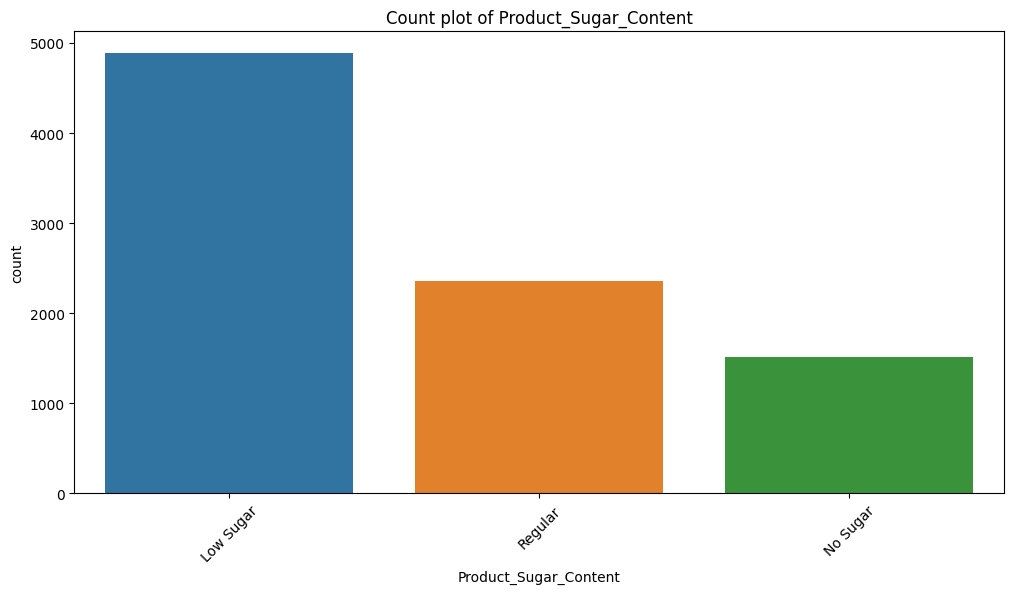

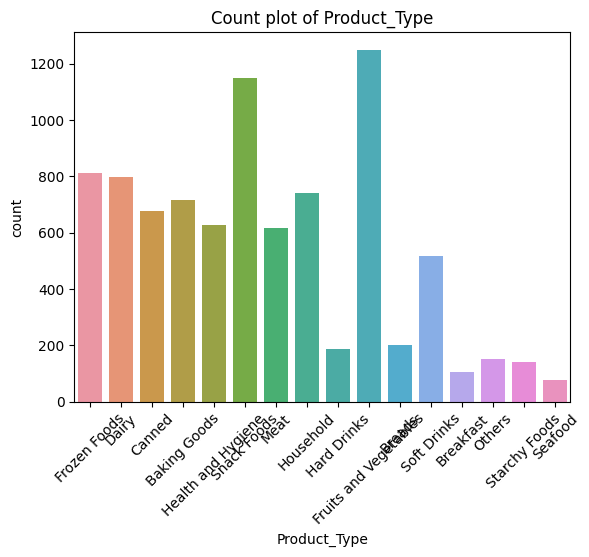

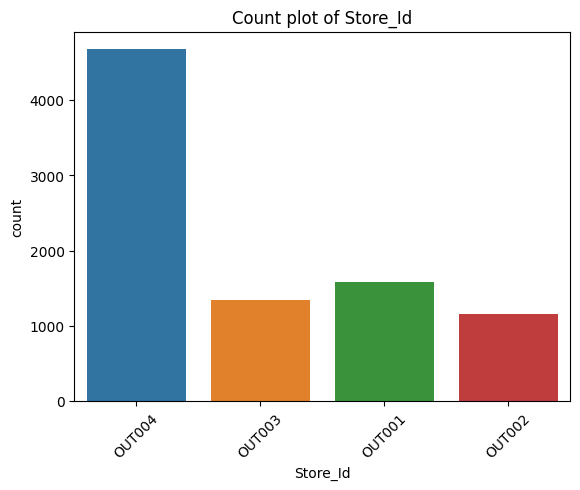

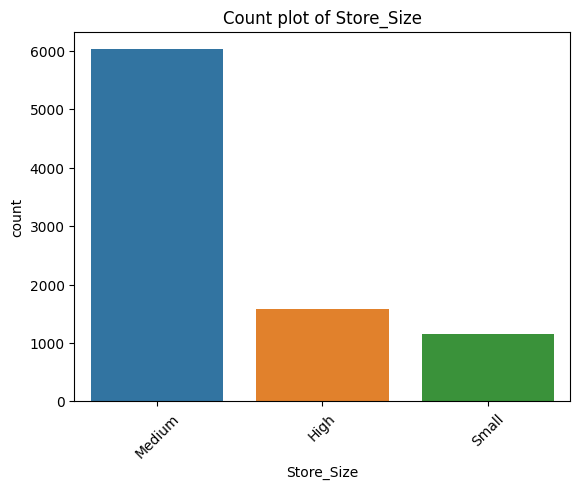

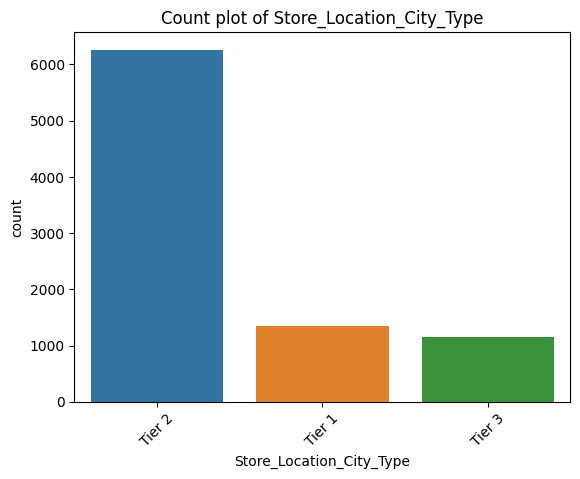

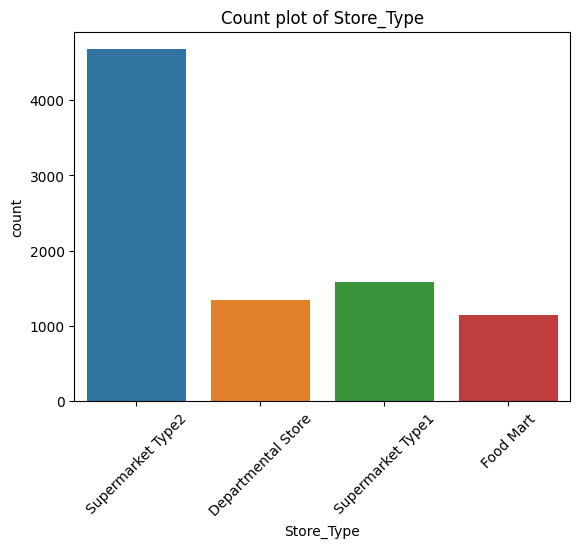

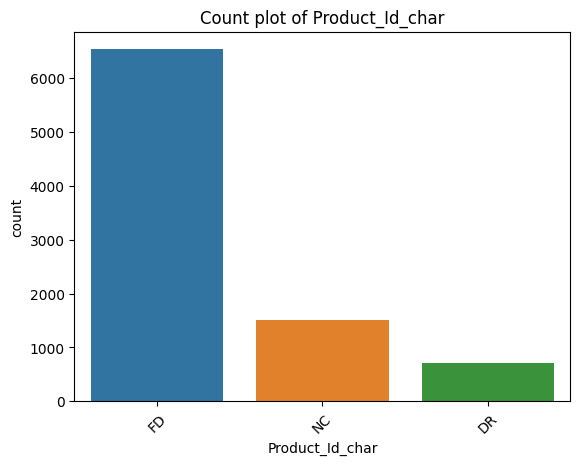

In [41]:
# Select categorical columns
categorical_cols = data.select_dtypes(include=['object'])

# Frequency distribution
for col in categorical_cols:
    print(data[col].value_counts())
    print('-' * 50)

# Visualization - Count plots
plt.figure(figsize=(12, 6))
for col in categorical_cols:
    sns.countplot(data=data, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Count plot of {col}')
    plt.show()

Product_Weight

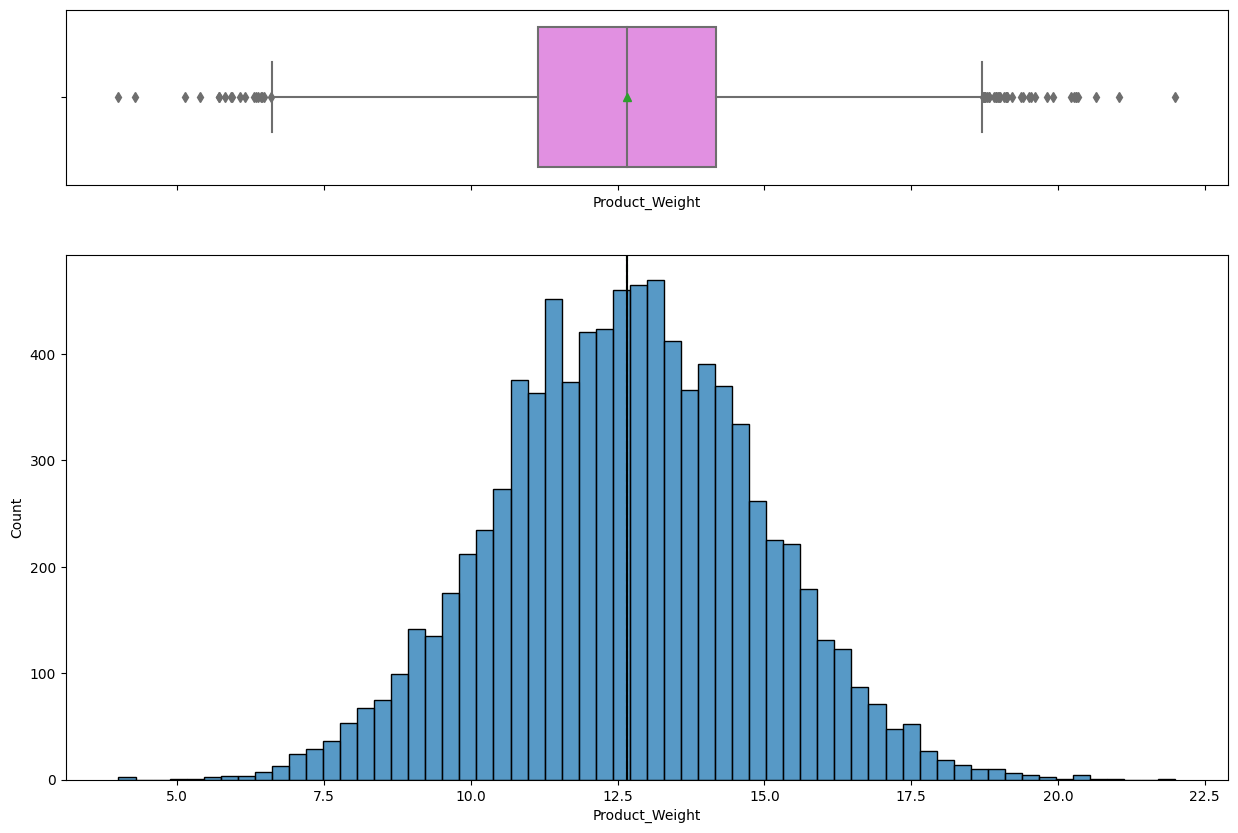

In [42]:
histogram_boxplot(data, "Product_Weight")

OBSERVATION: Product weight varies between 5.0 and ~21. 25% below 11, 50% below 12.5 and 75%below 14. There are some outliers on left and right side of box plot.

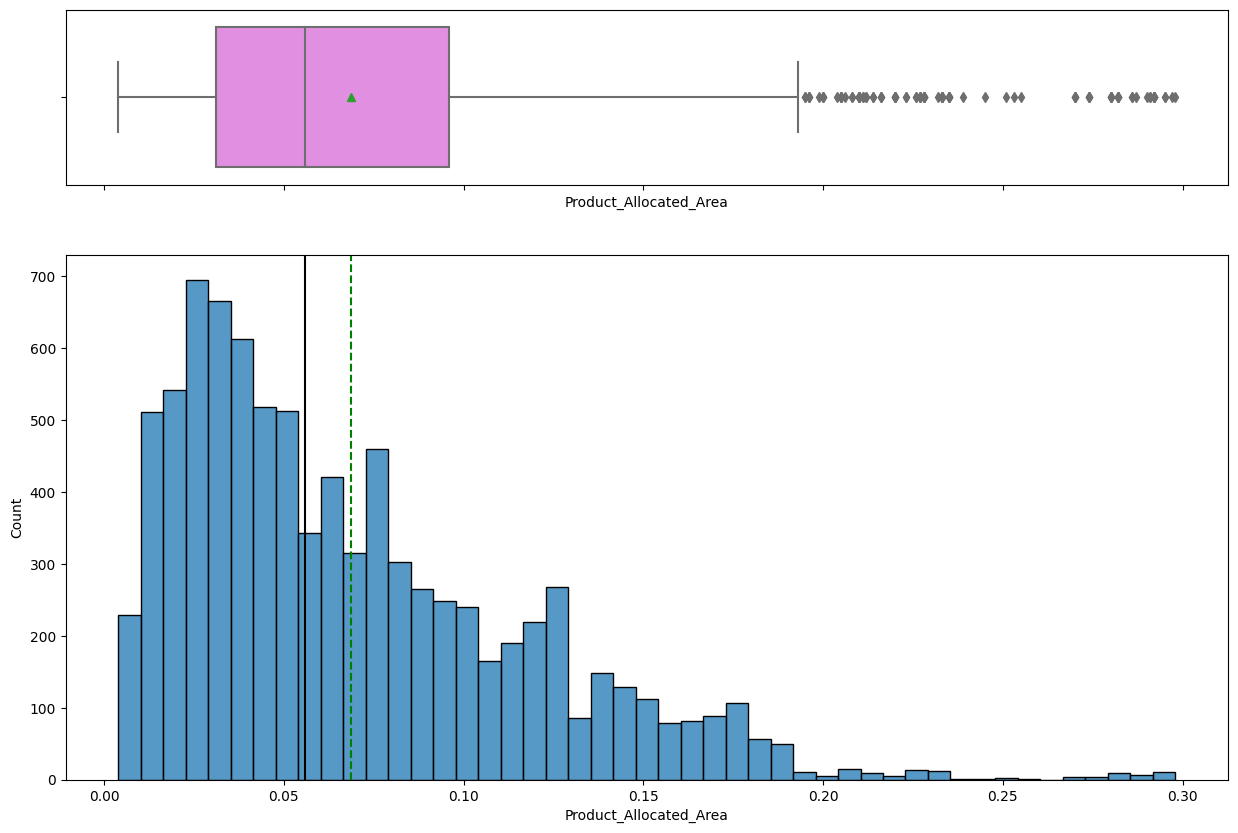

In [43]:
histogram_boxplot(data, "Product_Allocated_Area")

OBSERVATIONS: Product allocated area is skewed on right.

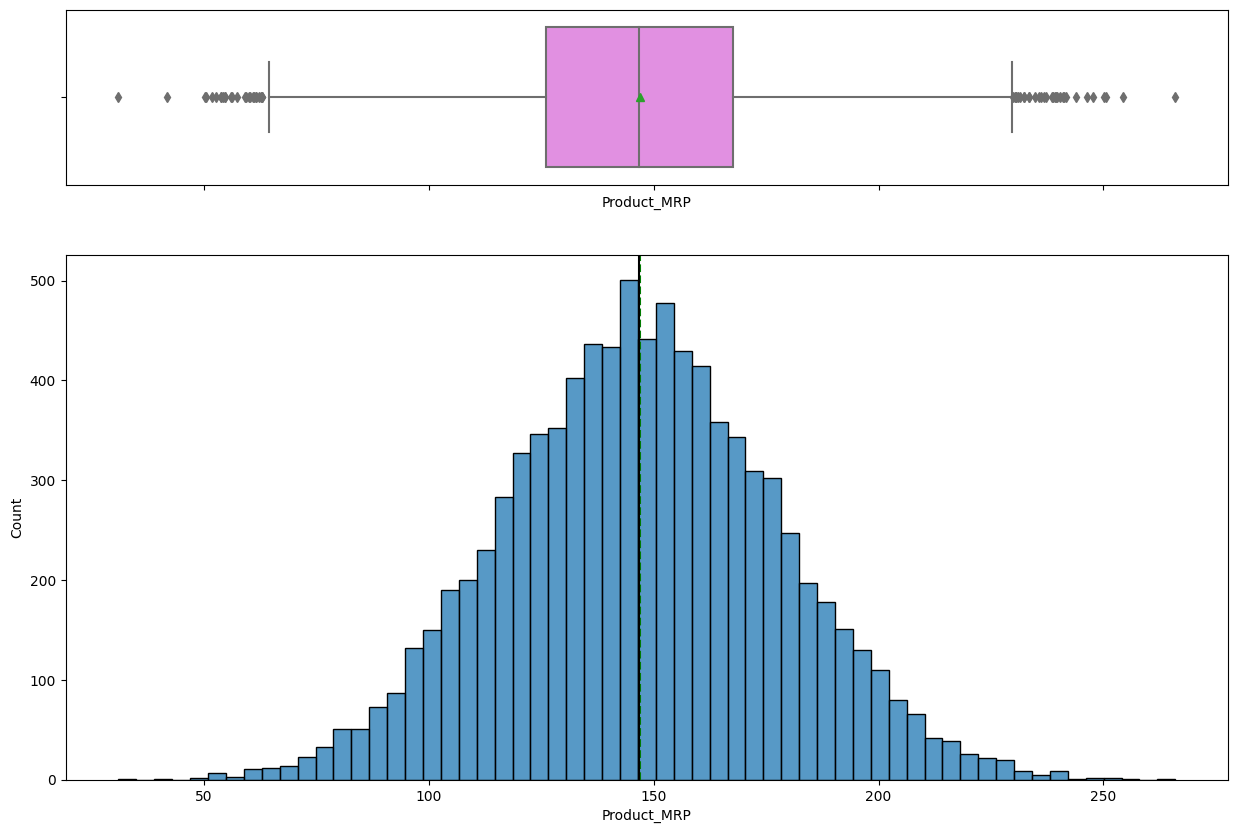

In [44]:
histogram_boxplot(data, "Product_MRP")

OBSERVATION: Product MRP has lower wick at 52 and higher wick around 230.

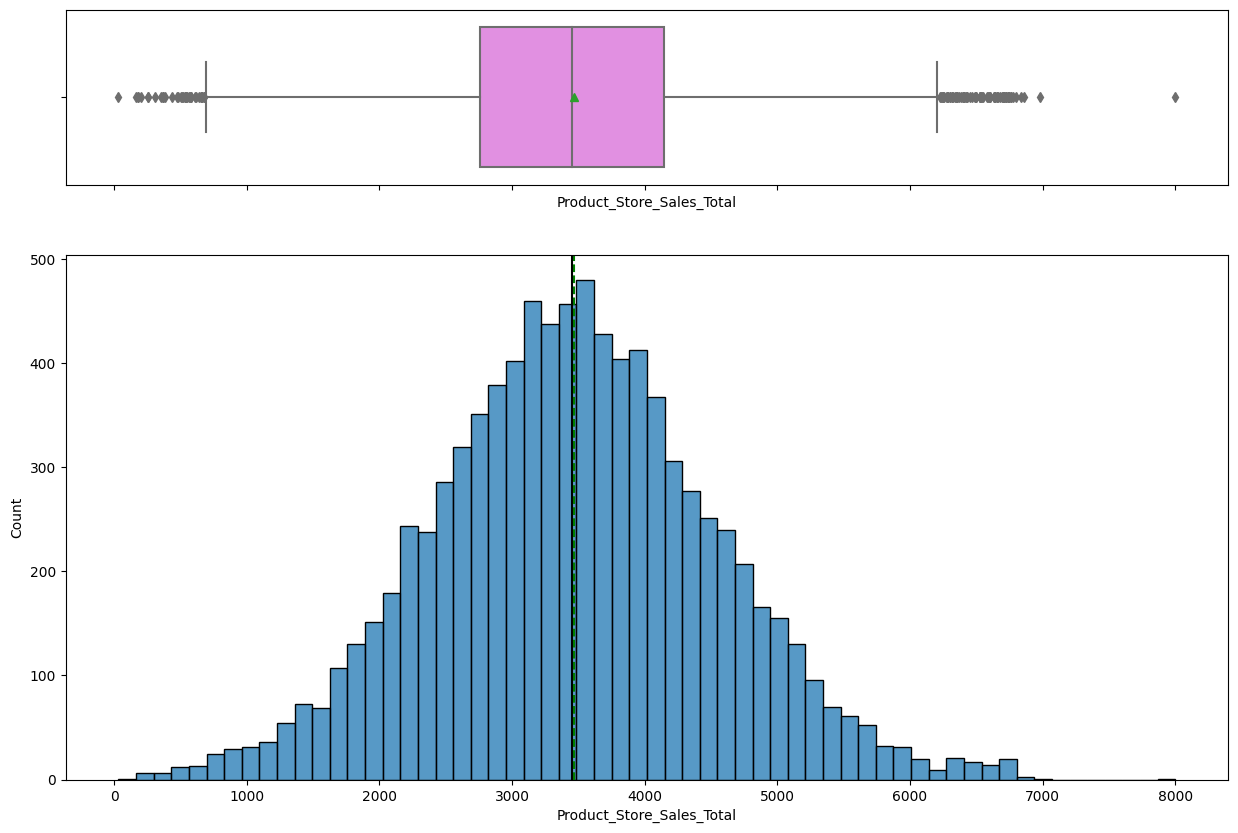

In [45]:
histogram_boxplot(data, "Product_Store_Sales_Total")

OBSERVATION: Product sales total is bewteen 3 to 8000. 50 percantile of sales total is at 3400.

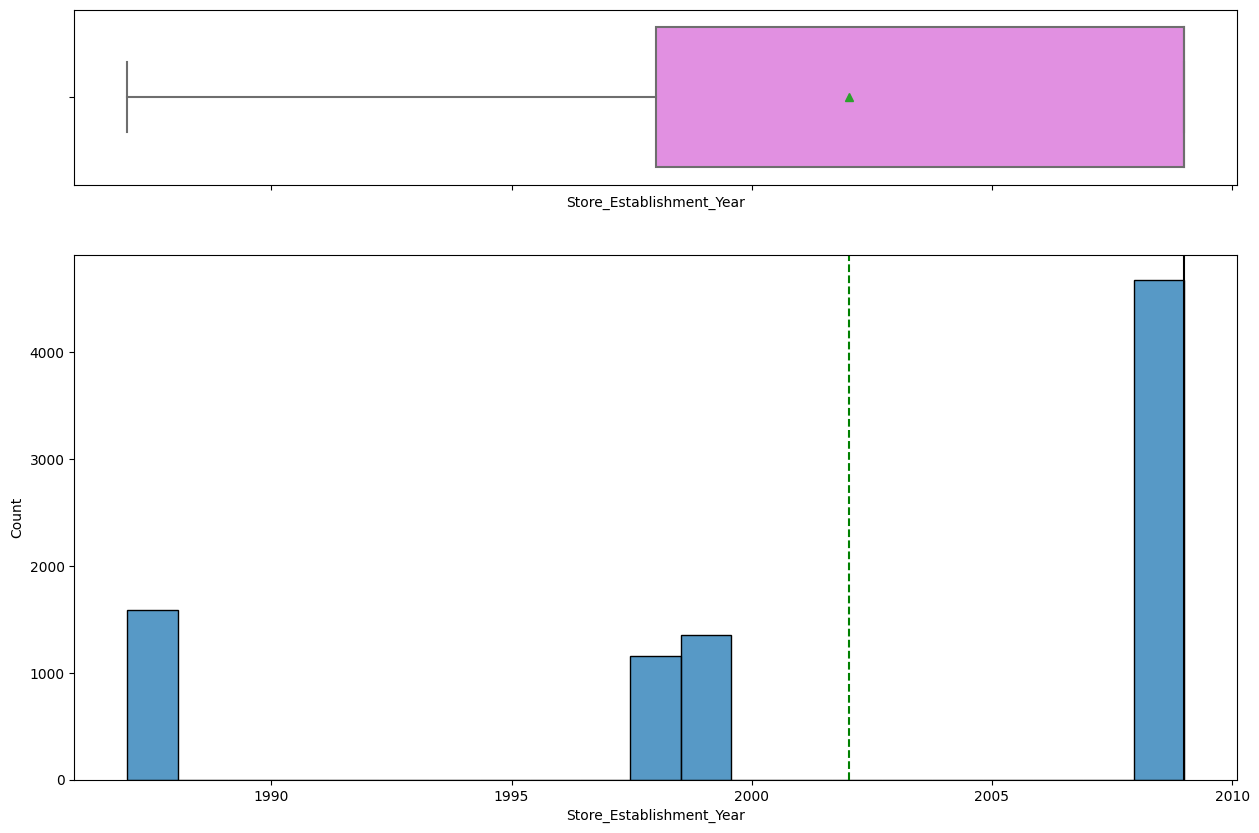

In [46]:
histogram_boxplot(data, "Store_Establishment_Year")

OBSERVATION: Stores are established between 1987 and 2009. There are more sales records for the stores established on 2009 and least for stores established in 1987. No stores established after 1987 till 1998.

### Lets do some labeled barplots

In [47]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

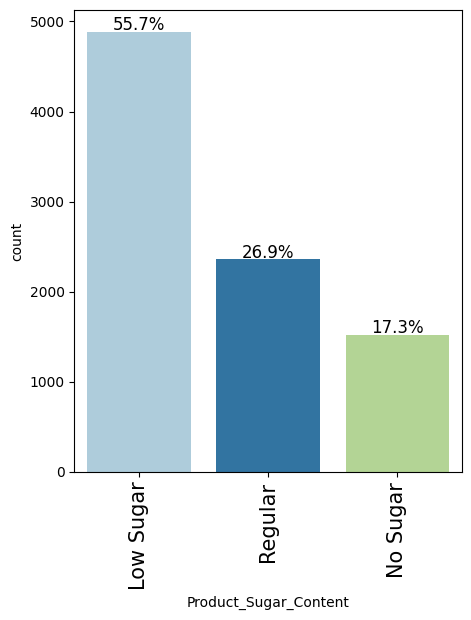

In [48]:
labeled_barplot(data, "Product_Sugar_Content", perc=True)

Low sugar products have highest number of records where as regular has lowest.


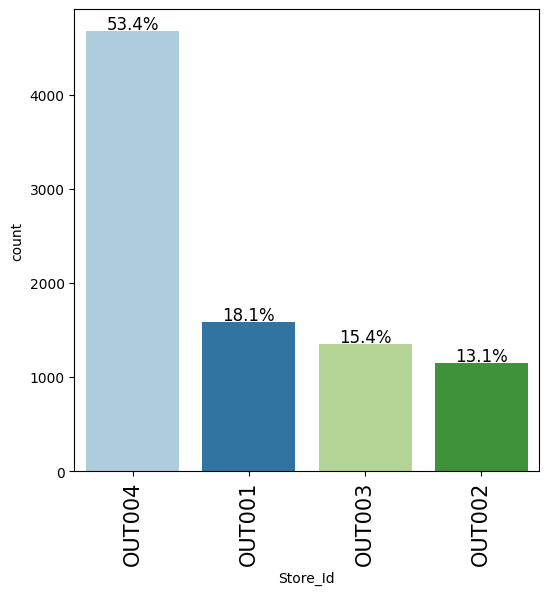

In [49]:
labeled_barplot(data, "Store_Id", perc=True)

OUT004 has highest number of records in data set where as OUT002 has lowest.

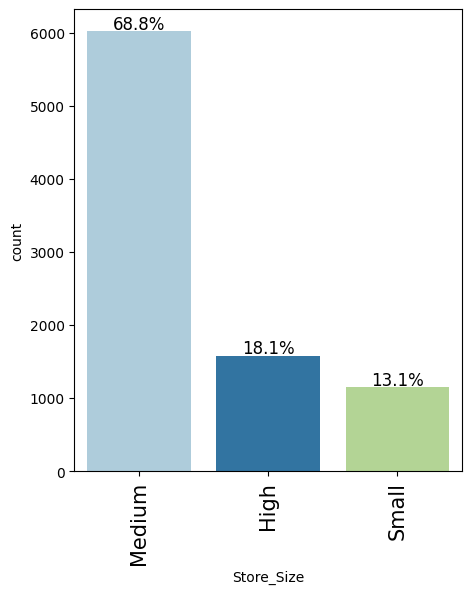

In [50]:
labeled_barplot(data, "Store_Size", perc=True)

Medium sized store has more products to sell where as small store has least products.


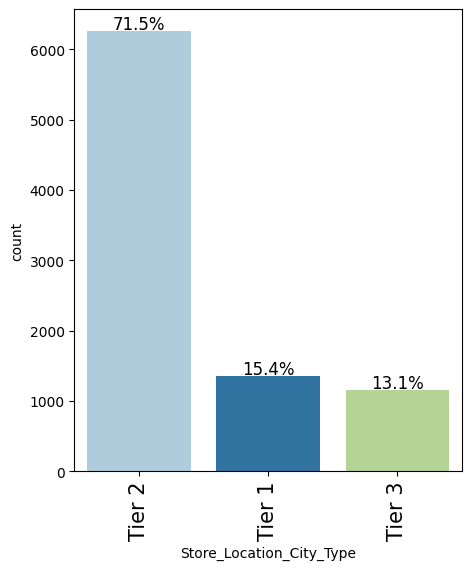

In [51]:
labeled_barplot(data, "Store_Location_City_Type", perc=True)

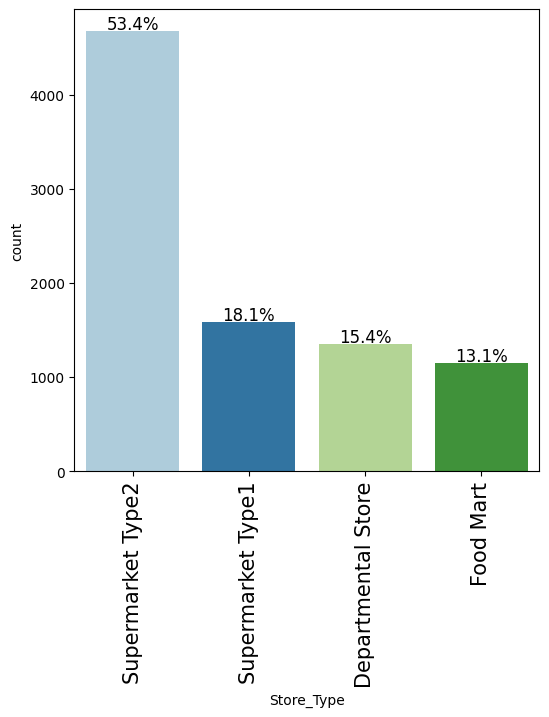

In [52]:
labeled_barplot(data, "Store_Type", perc=True)

Tier2 and Supermarket type2 has more product sell respectively.

###Lets move on to Bivariate Analysis

Now moving forward to explor the relationships between two variables in the dataset.

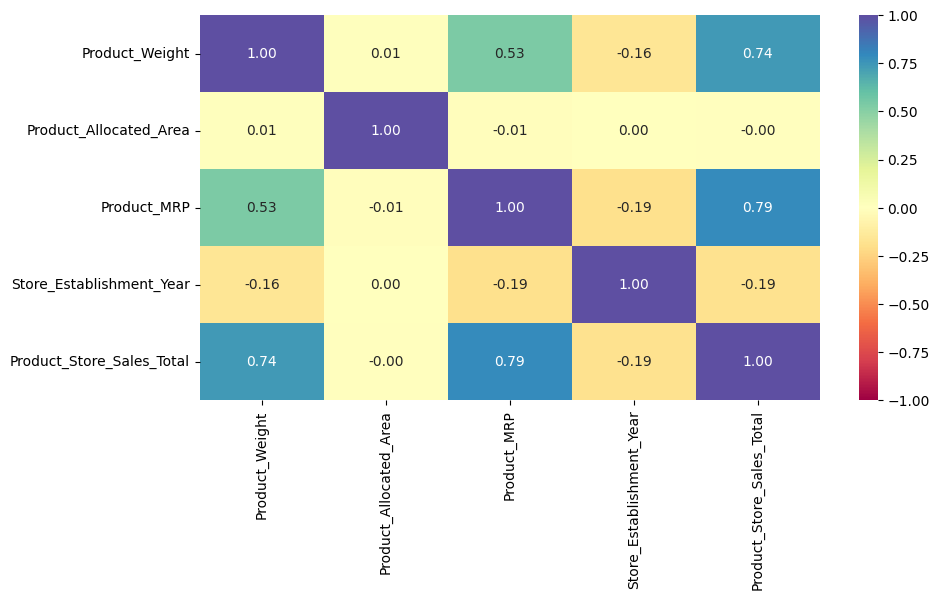

In [53]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


Observation: Product weight and Product MRP influencing total sale more than any othe rparameters. Store estblished year does not imapct sales much.

###let's visualize the distribution of the target variable "Product_Store_Sales_Total" with respect to the numerical columns

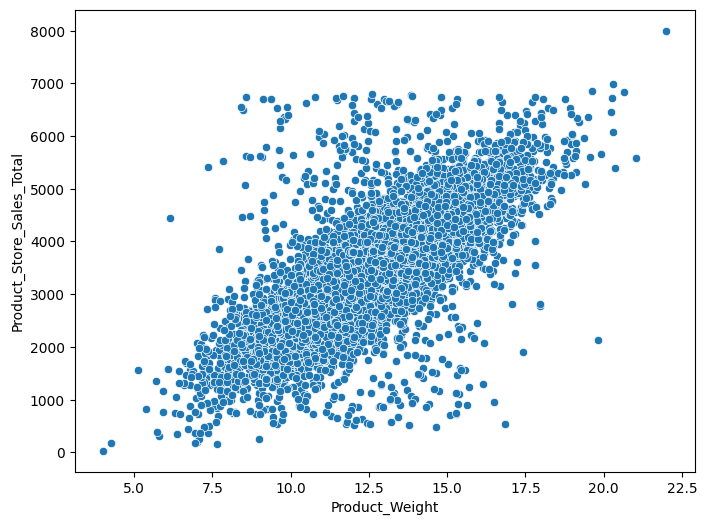

In [54]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_Weight, y=data.Product_Store_Sales_Total)
plt.show()

Pruduct weight has a linear relation with sale.

Text(0.5, 1.0, 'Product_Allocated_Area vs. Product_Store_Sales_Total')

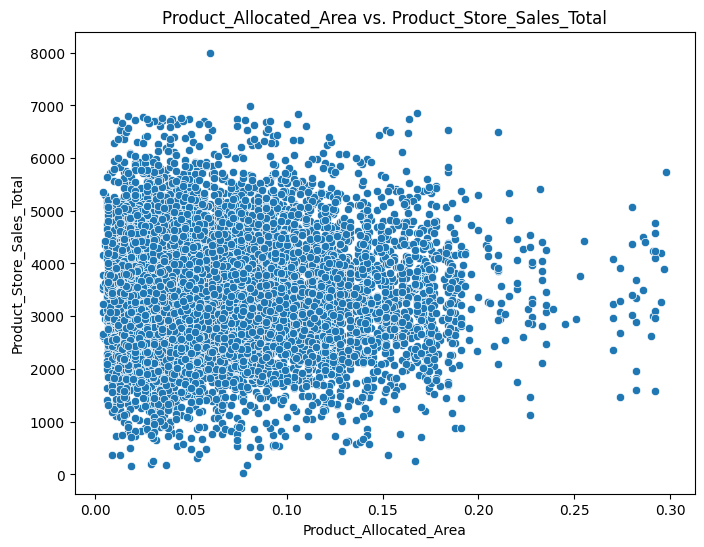

In [55]:
# Scatter plot of Allocated_Area vs. Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
sns.scatterplot(data=data, x="Product_Allocated_Area", y="Product_Store_Sales_Total")
plt.title("Product_Allocated_Area vs. Product_Store_Sales_Total")


No linear relation for product allocated area.

Text(0.5, 1.0, 'Product_MRP vs. Product_Store_Sales_Total')

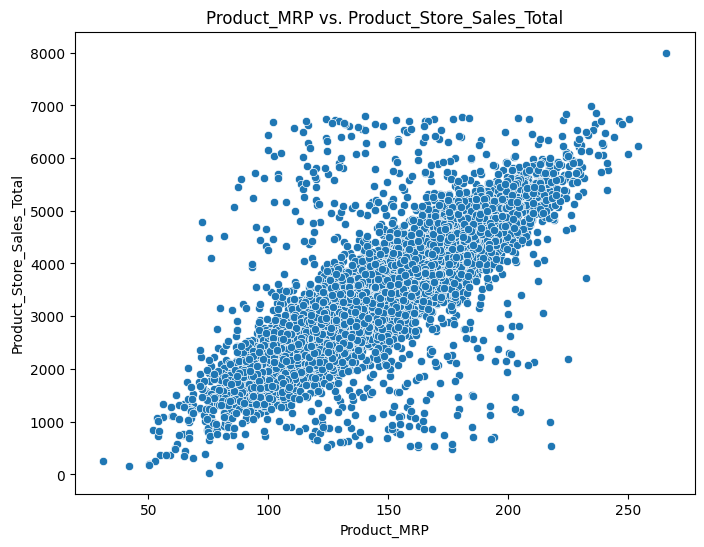

In [56]:
# Scatter plot of Product_MRP vs. Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
sns.scatterplot(data=data, x="Product_MRP", y="Product_Store_Sales_Total")
plt.title("Product_MRP vs. Product_Store_Sales_Total")

Product MRP does ha a linear relationship with store sales.

Text(0.5, 1.0, 'Store_Establishment_Year vs. Product_Store_Sales_Total')

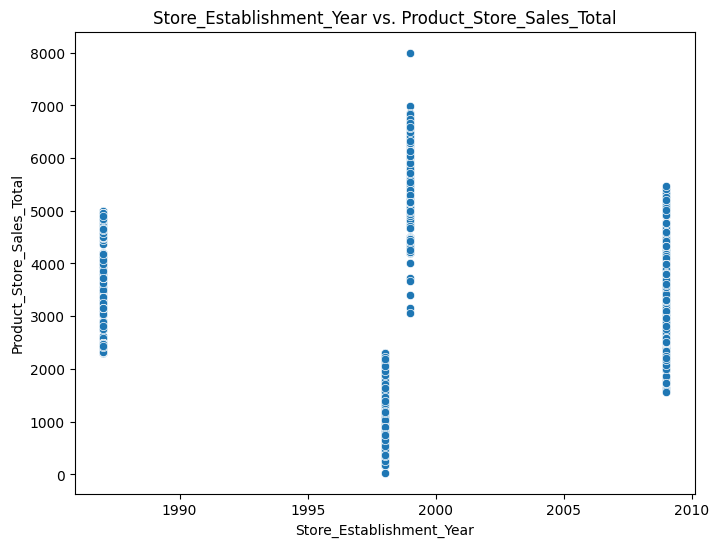

In [57]:
# Scatter plot of Store_Establishment_Year vs. Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
sns.scatterplot(data=data, x="Store_Establishment_Year", y="Product_Store_Sales_Total")
plt.title("Store_Establishment_Year vs. Product_Store_Sales_Total")

###Now lets check which product type of the company is generating most of the revenue.so we could see which product types contribute the most to the company's revenue.

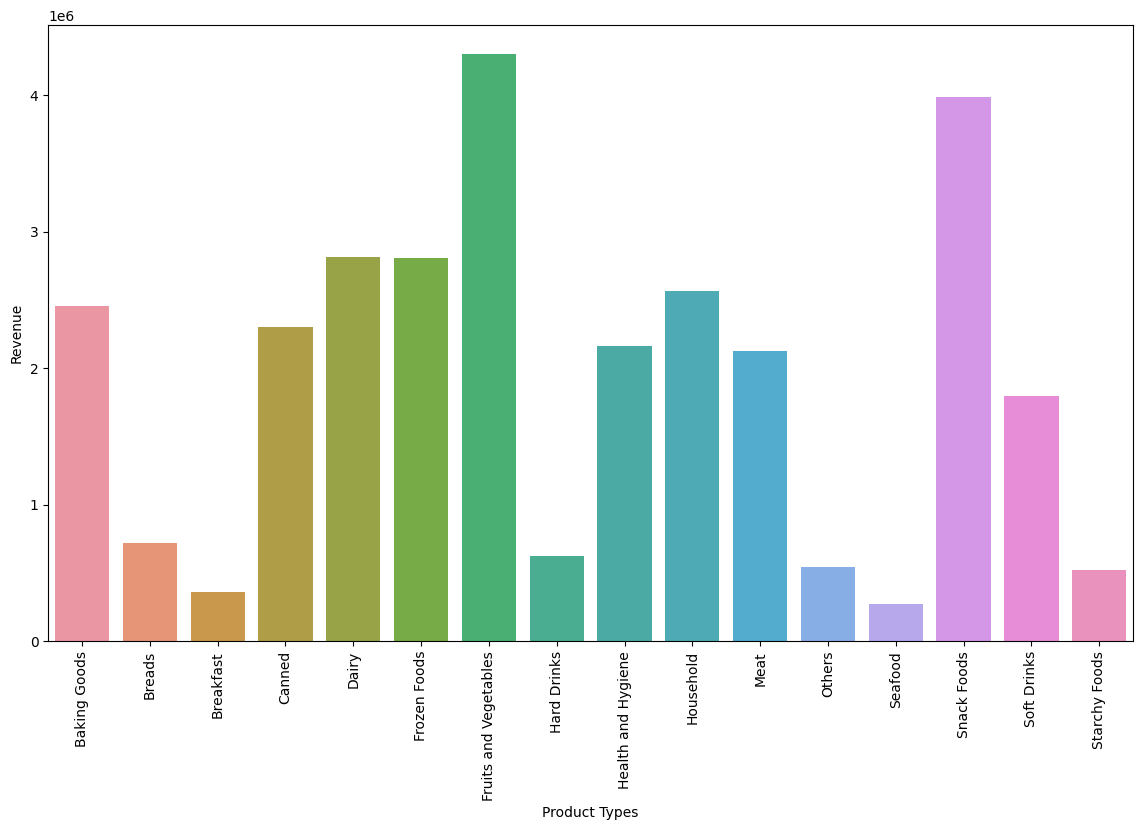

In [58]:
df_revenue1 = data.groupby(["Product_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.Product_Type, y=df_revenue1.Product_Store_Sales_Total)
a.set_xlabel("Product Types")
a.set_ylabel("Revenue")
plt.show()

Observation:

Product Type Contribution to Revenue:

The "Snack Foods" and "Fruits and Vegetables" product types contribute the most to the company's revenue.

"Dairy," "Household," and "Frozen Foods" are also significant contributors to the revenue.


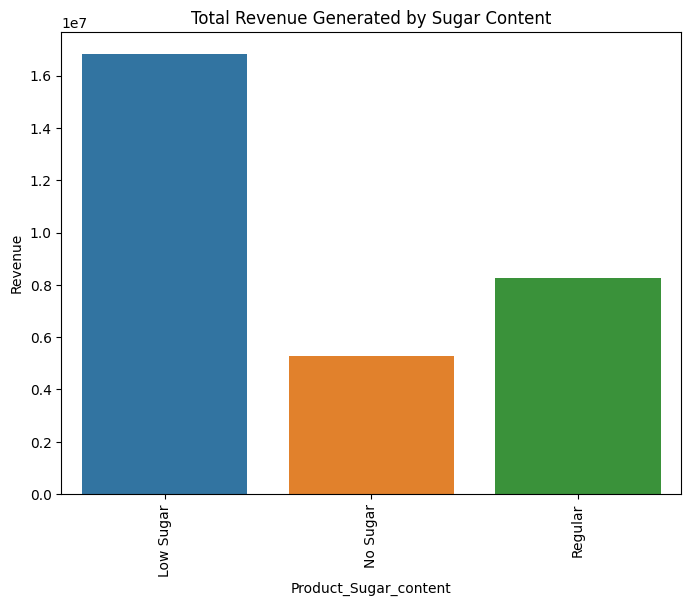

In [59]:
df_revenue2 = data.groupby(["Product_Sugar_Content"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
b = sns.barplot(data=df_revenue2, x="Product_Sugar_Content", y="Product_Store_Sales_Total")
b.set_xlabel("Product_Sugar_content")
b.set_ylabel("Revenue")
plt.title("Total Revenue Generated by Sugar Content")
plt.show()

Low sugar content products contributing more to the revenue than no sugar product.

### Now lets see which type of stores and locations the revenue generation is higher,

 calculating the total revenue for each "Store_Type" and "Store_Location_City_Type" category using the groupby function.

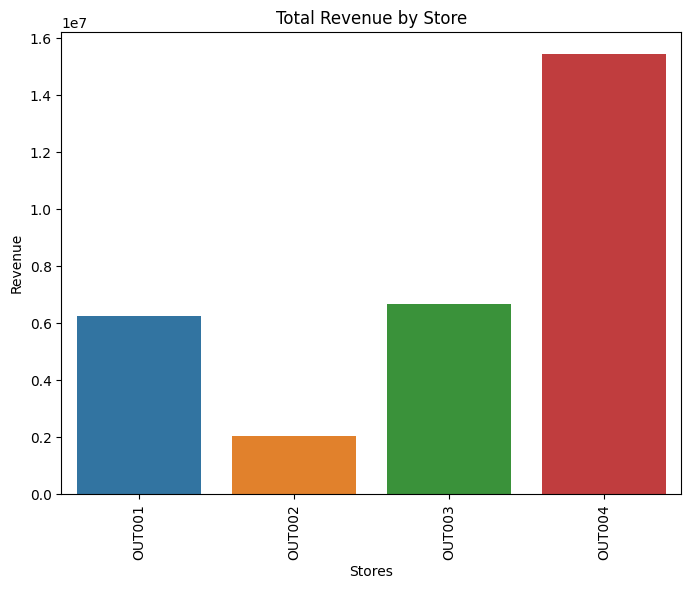

In [60]:
df_store_revenue = data.groupby(["Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
r = sns.barplot(data=df_store_revenue, x="Store_Id", y="Product_Store_Sales_Total")
r.set_xlabel("Stores")
r.set_ylabel("Revenue")
plt.title("Total Revenue by Store")
plt.show()

Observation:


Store-Specific Revenue:

Store IDs "OUT004" has highest revenue where as "OUT002" has lowest revenue.


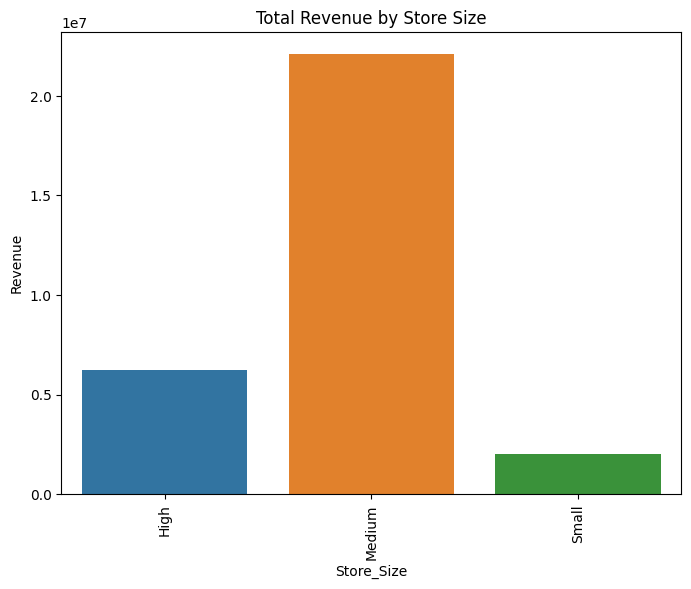

In [61]:
df_revenue3 = data.groupby(["Store_Size"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
c = sns.barplot(data=df_revenue3, x="Store_Size", y="Product_Store_Sales_Total")
c.set_xlabel("Store_Size")
c.set_ylabel("Revenue")
plt.title("Total Revenue by Store Size")
plt.show()


Observation:

Store Size and Revenue:

Stores with "Medium" and "High" sizes generate higher revenue compared to "Small" stores.





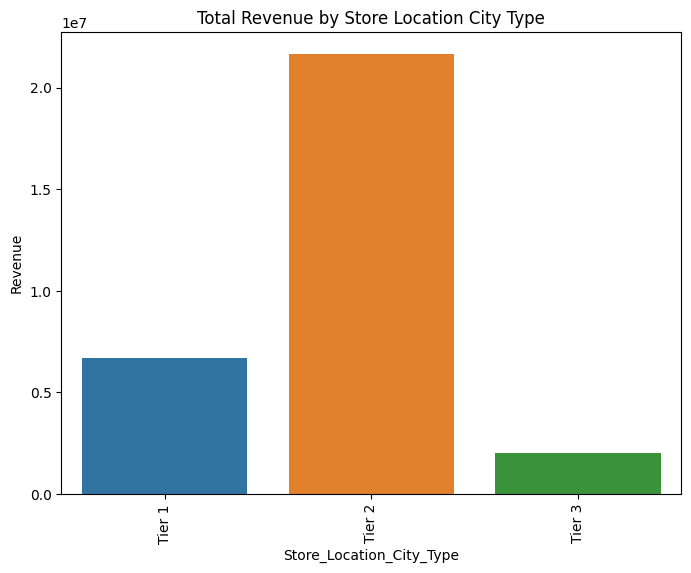

In [62]:
df_revenue4 = data.groupby(["Store_Location_City_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
d = sns.barplot(data=df_revenue4, x="Store_Location_City_Type", y="Product_Store_Sales_Total")
d.set_xlabel("Store_Location_City_Type")
d.set_ylabel("Revenue")
plt.title("Total Revenue by Store Location City Type")
plt.show()

Observation:

Store Location City Type and Revenue:


"Tier 2" cities generate the most revenue, followed by "Tier 1" and "Tier 3" locations.


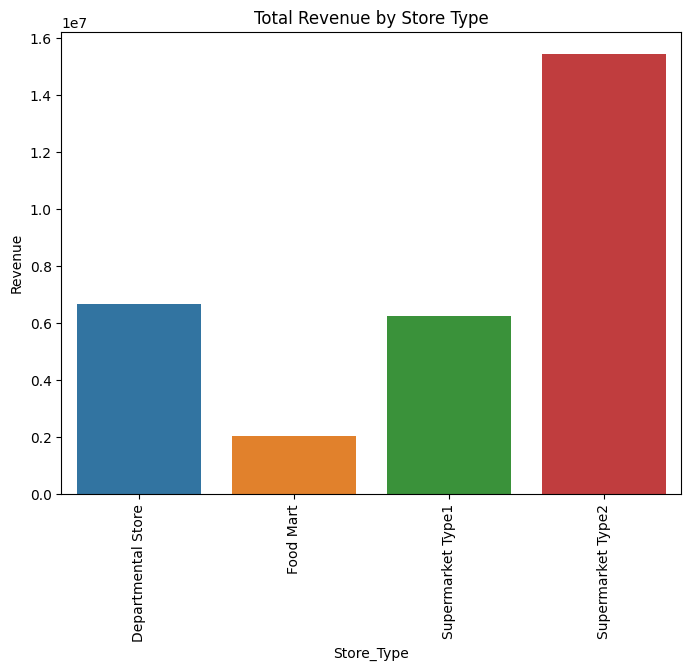

In [63]:
df_revenue5 = data.groupby(["Store_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
e = sns.barplot(data=df_revenue5, x="Store_Type", y="Product_Store_Sales_Total")
e.set_xlabel("Store_Type")
e.set_ylabel("Revenue")
plt.title("Total Revenue by Store Type")
plt.show()

Observation:

Supermarket Type2 stores contribute the highest revenue, followed by departmental store.
"Food Mart" store generate relatively lower revenue compared to the other types.


### Let's check the distribution of the target variable "Product_Store_Sales_Total" with respect to other categorical columns

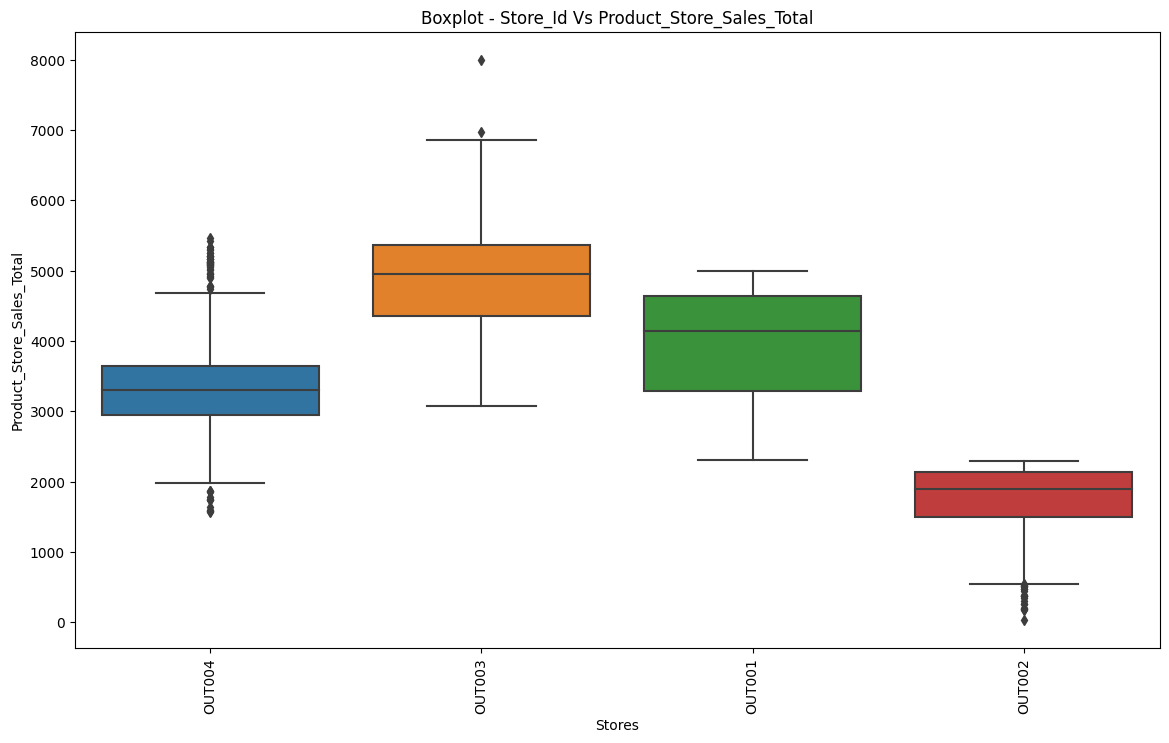

In [64]:
plt.figure(figsize=[14, 8])
sns.boxplot(data=data, x="Store_Id", y="Product_Store_Sales_Total")
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total")
plt.show()

Observation:

•	The distribution of "Product_Store_Sales_Total" varies across different stores ("Store_Id").

•	Some stores have a higher median sales total, indicating consistently higher revenue generation compared to other stores.

•	Outliers are present in OUT003, which could indicate occasional exceptionally high store sales totals.

•	The box plot highlights the diversity in revenue generation across different stores, suggesting that certain stores perform better in terms of sales totals compared to others.

This observation provides insights into the variability of revenue generation among different stores and indicates potential areas for further analysis and improvement strategies for underperforming stores.


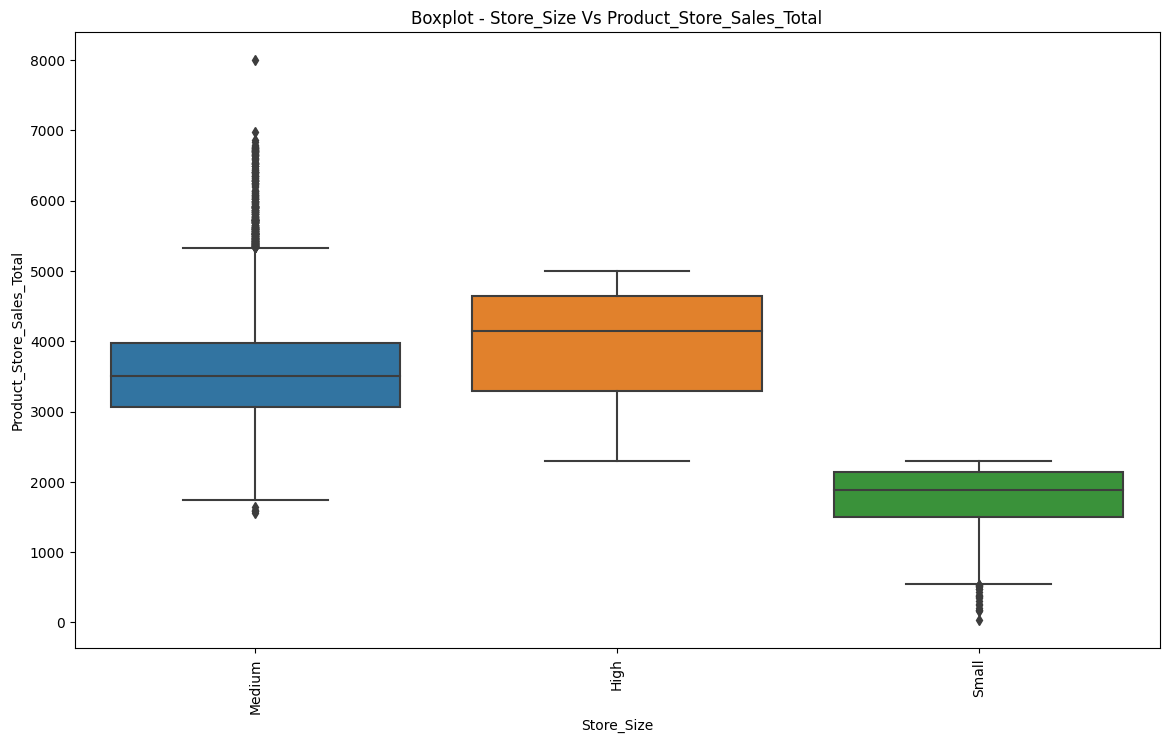

In [65]:
plt.figure(figsize=[14, 8])
sns.boxplot(data=data, x="Store_Size", y="Product_Store_Sales_Total")
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Size Vs Product_Store_Sales_Total")
plt.xlabel("Store_Size")
plt.ylabel("Product_Store_Sales_Total")
plt.show()

Observation:

The distribution of "Product_Store_Sales_Total" varies across different store sizes ("Store_Size").

Stores with "Medium" and "High" sizes tend to have higher median sales totals compared to "Small" stores.

The interquartile range (IQR) for "Medium" and "High" store sizes is wider, suggesting variations in revenue within those store sizes.

"Small" stores have a smaller IQR, indicating a more consistent range of sales totals.

Outliers are present in medium store indicating stores with exceptionally high revenue.

This observation provides insights into how store size impacts revenue generation, with "Medium" and "High" stores generally showing higher median sales totals and more revenue variability compared to "Small" stores. These insights can help guide decision-making related to store size strategies and performance evaluation.


#### Let's now try to explore relationships between the other columns

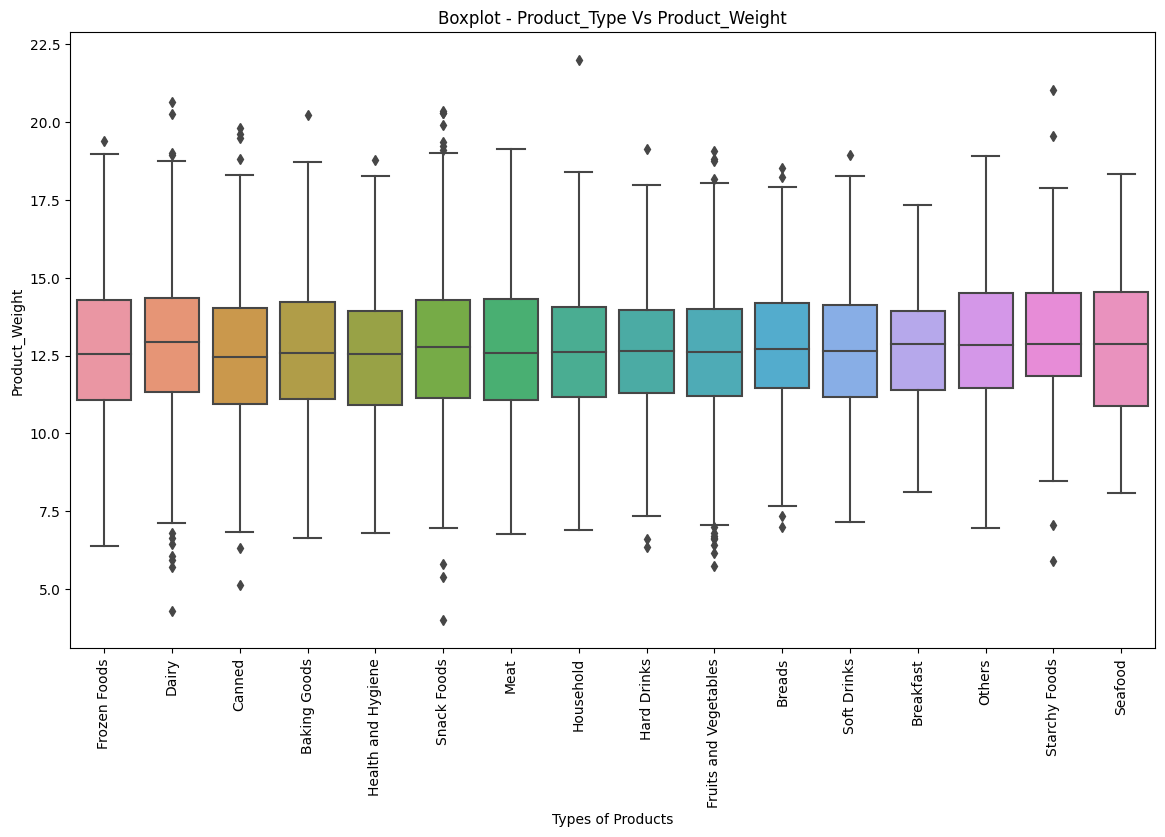

In [66]:
plt.figure(figsize=[14, 8])
sns.boxplot(data=data, x="Product_Type", y="Product_Weight")
plt.xticks(rotation=90)
plt.title("Boxplot - Product_Type Vs Product_Weight")
plt.xlabel("Types of Products")
plt.ylabel("Product_Weight")
plt.show()

### Now lets see Pair plots

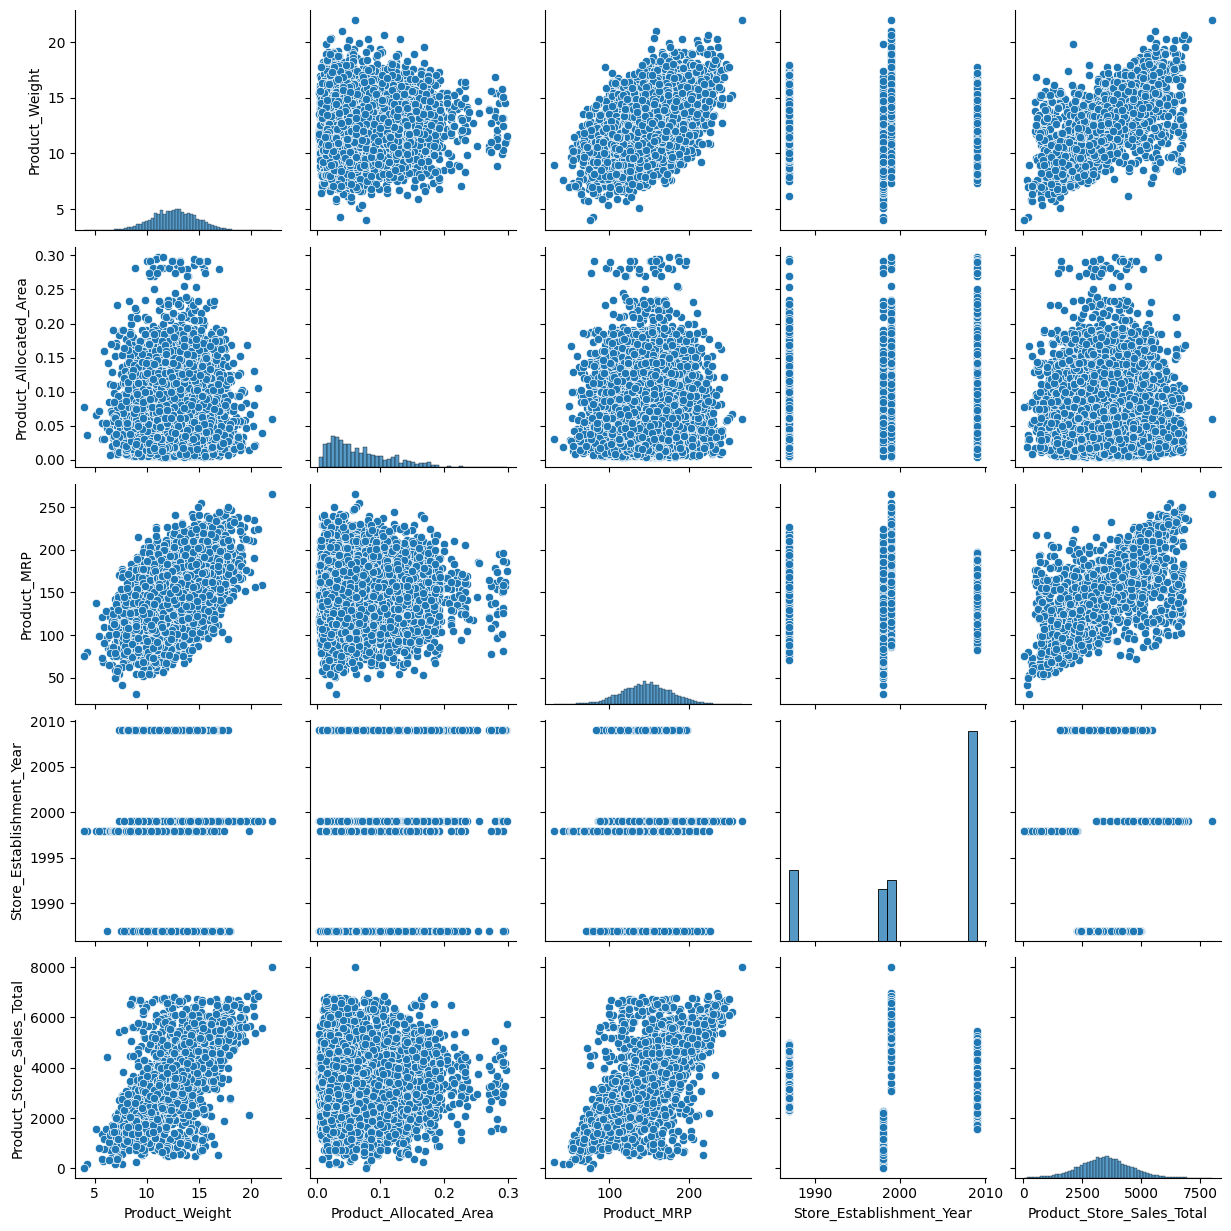

In [67]:
# Create pair plots
sns.pairplot(data, vars=["Product_Weight", "Product_Allocated_Area", "Product_MRP", "Store_Establishment_Year", "Product_Store_Sales_Total"])
plt.show()

Observation:

•	The distribution of "Product_Weight" varies across different types of products ("Product_Type").

•	Some product types have a wide range of weights, while others have a narrower range.

•	Certain product types, such as "Snack Foods," "Canned," and "Household," have a higher median product weight compared to other types.

•	"Baking Goods," "Frozen Foods," and "Fruits and Vegetables" also show variations in product weights, but their medians are relatively lower.


####Lets explore the relationship between the weight of the product and its sugar content

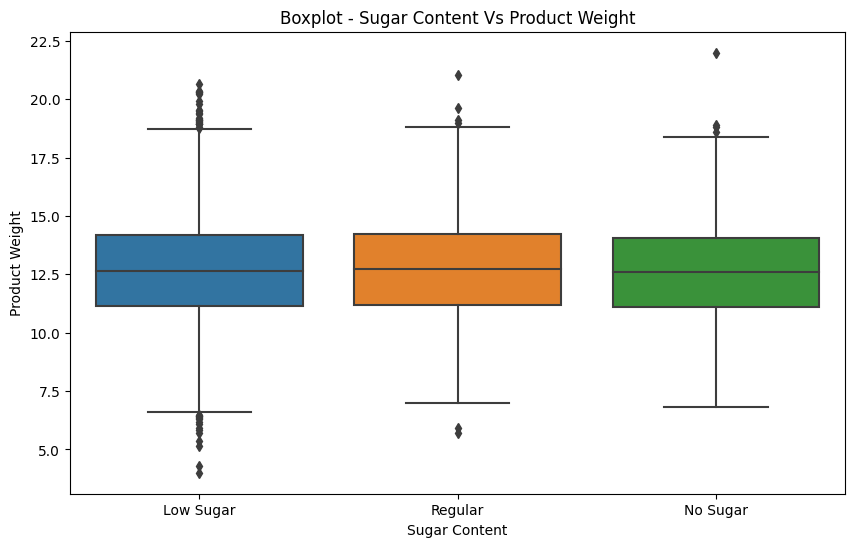

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Product_Sugar_Content", y="Product_Weight")
plt.title("Boxplot - Sugar Content Vs Product Weight")
plt.xlabel("Sugar Content")
plt.ylabel("Product Weight")
plt.show()

Observation:

Products with "Low Sugar" content tend to have a wider range of weights, as indicated by a larger interquartile range (IQR).

Products with "Regular Sugar" content also show a wide distribution of weights, but their median weight is slightly higher compared to "Low Sugar."

Products with "No Sugar" content have a relatively narrower range of weights, with a lower median weight compared to the other two categories.





### Analyzing the sugar content of different product types

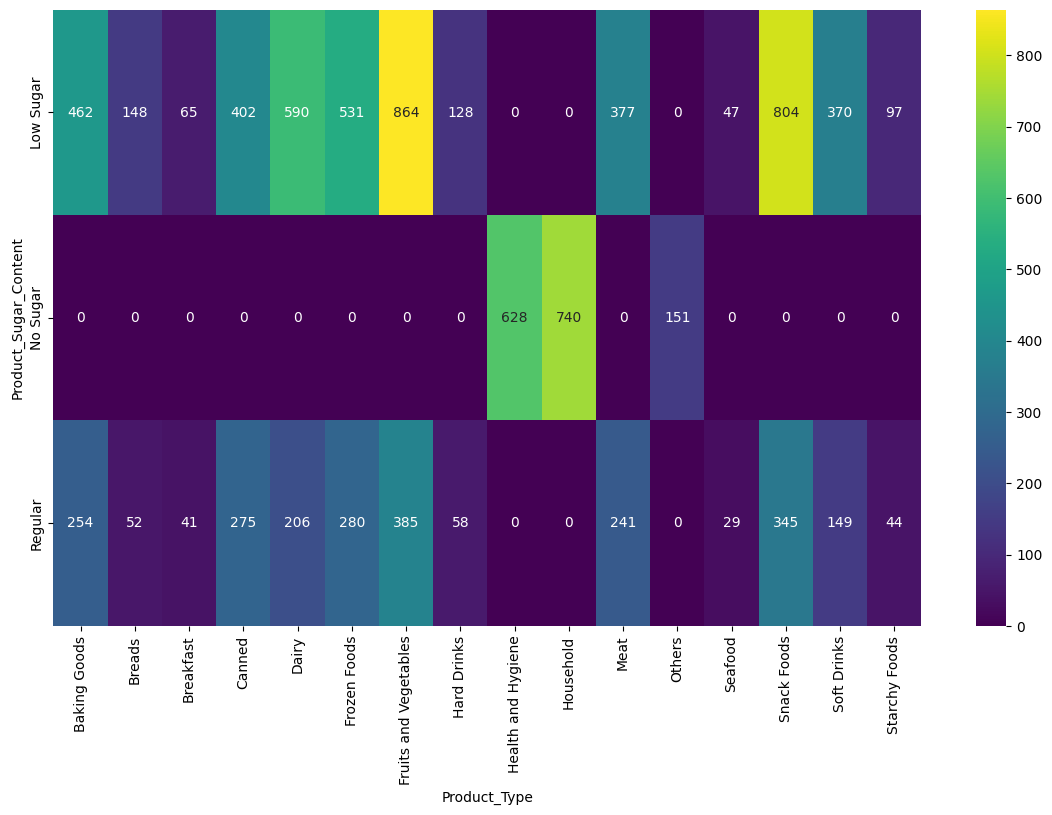

In [69]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    pd.crosstab(data["Product_Sugar_Content"], data["Product_Type"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Product_Sugar_Content")
plt.xlabel("Product_Type")
plt.show()

Observation:

The count plot shows the distribution of sugar content categories ("Product_Sugar_Content") within each product type ("Product_Type").
 The x-axis represents the product types, and the y-axis represents the count of products. Different sugar content categories are represented using different colors in the plot,

#### Now lets find out how many items of each product type have been sold in each store

In [70]:
product_store_counts = data.groupby(["Store_Id", "Product_Type"])["Product_Store_Sales_Total"].count().reset_index()

# Pivot the data for better visualization
pivot_table = product_store_counts.pivot(index="Store_Id", columns="Product_Type", values="Product_Store_Sales_Total")

# Display the pivot table
print(pivot_table)

Product_Type  Baking Goods  Breads  Breakfast  Canned  Dairy  Frozen Foods  \
Store_Id                                                                     
OUT001                 136      30         10     119    150           142   
OUT002                  96      23         15      88    104           101   
OUT003                  99      34         19      90    145           122   
OUT004                 385     113         62     380    397           446   

Product_Type  Fruits and Vegetables  Hard Drinks  Health and Hygiene  \
Store_Id                                                               
OUT001                          199           38                 114   
OUT002                          168           30                  91   
OUT003                          182           23                  89   
OUT004                          700           95                 334   

Product_Type  Household  Meat  Others  Seafood  Snack Foods  Soft Drinks  \
Store_Id              

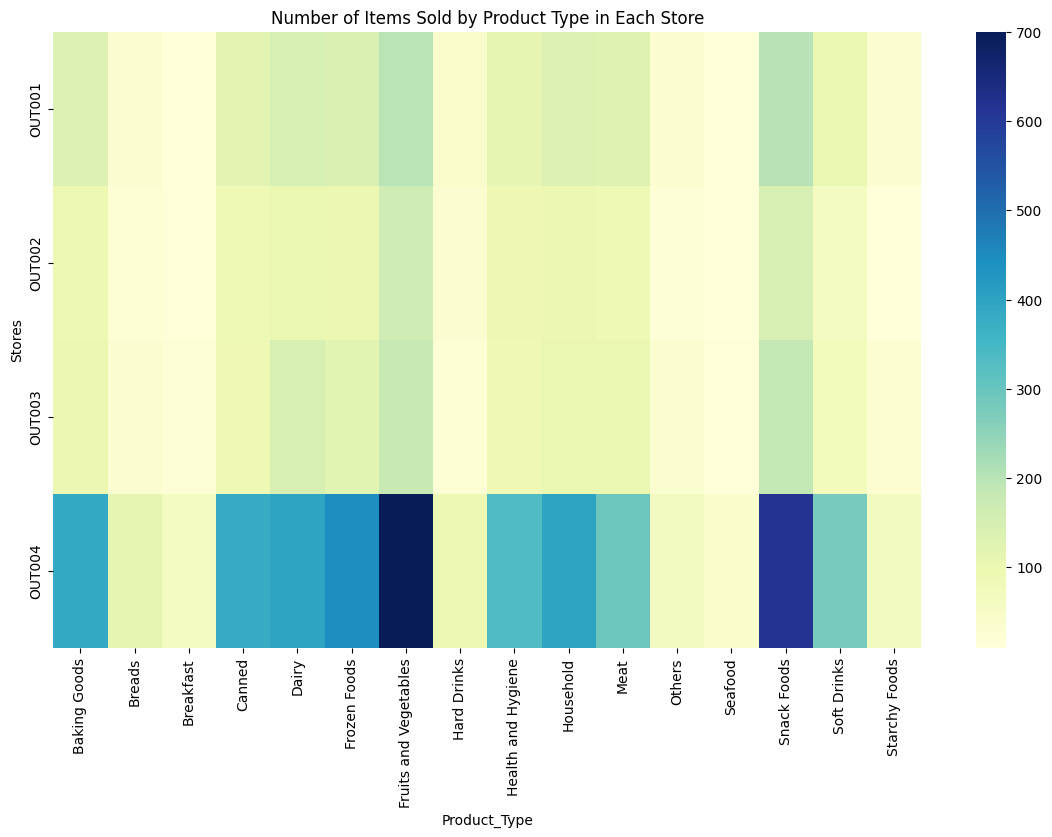

In [71]:
plt.figure(figsize=(14, 8))
sns.heatmap(data=pivot_table, cmap="YlGnBu")
plt.ylabel("Stores")
plt.xlabel("Product_Type")
plt.title("Number of Items Sold by Product Type in Each Store")
plt.show()

Observation:
The heatmap represents the count of items of each product type sold in each store. OUT004 has highest number of items sold in most of the product type categories.

####Checking the trend of prices across different product types,

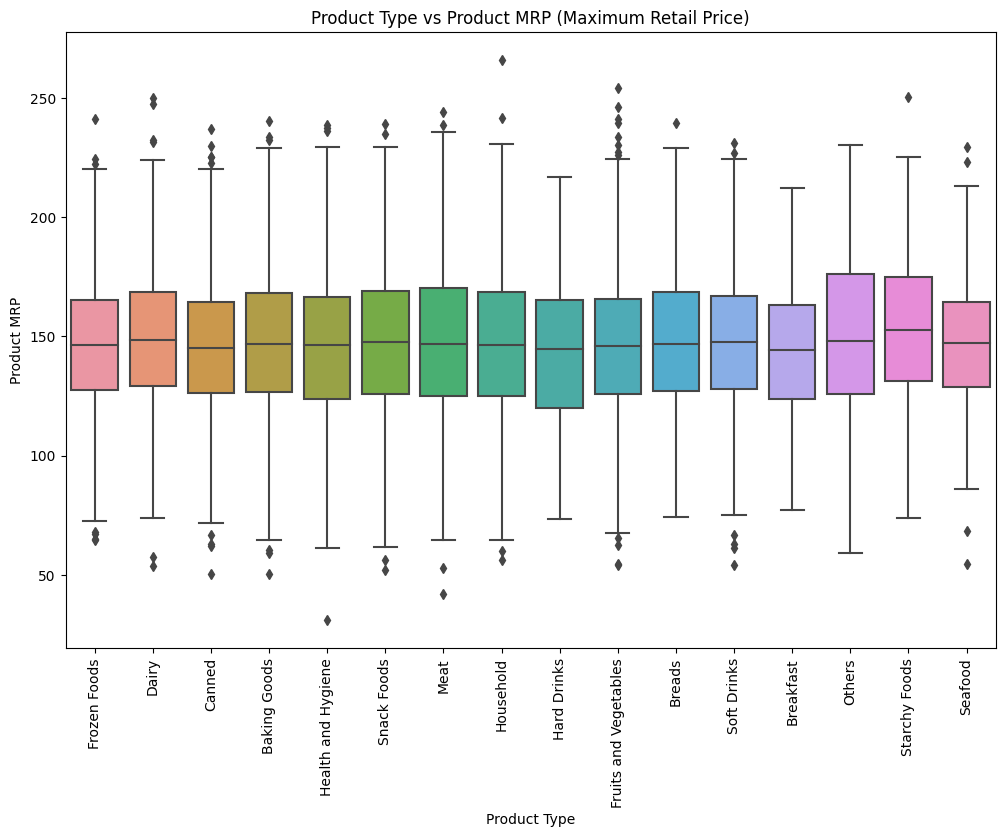

In [72]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x="Product_Type", y="Product_MRP")
plt.xticks(rotation=90)
plt.title("Product Type vs Product MRP (Maximum Retail Price)")
plt.xlabel("Product Type")
plt.ylabel("Product MRP")
plt.show()

Observation:

•	The box plot illustrates the distribution of maximum retail prices ("Product_MRP") across different product types ("Product_Type").

•	Some product types have wider interquartile ranges (IQRs), indicating variations in price range.

•	Certain product types, such as "Hard Drinks," "Health and Hygiene," and "Starchy Foods," tend to have higher median prices compared to other types.

•	Other types, like "Household," "Canned," and "Breads," exhibit lower median prices.

•	Outliers are visible in multiple product types, indicating products with significantly higher prices compared to the rest.


### Let's find out how the Product_MRP varies with the different stores

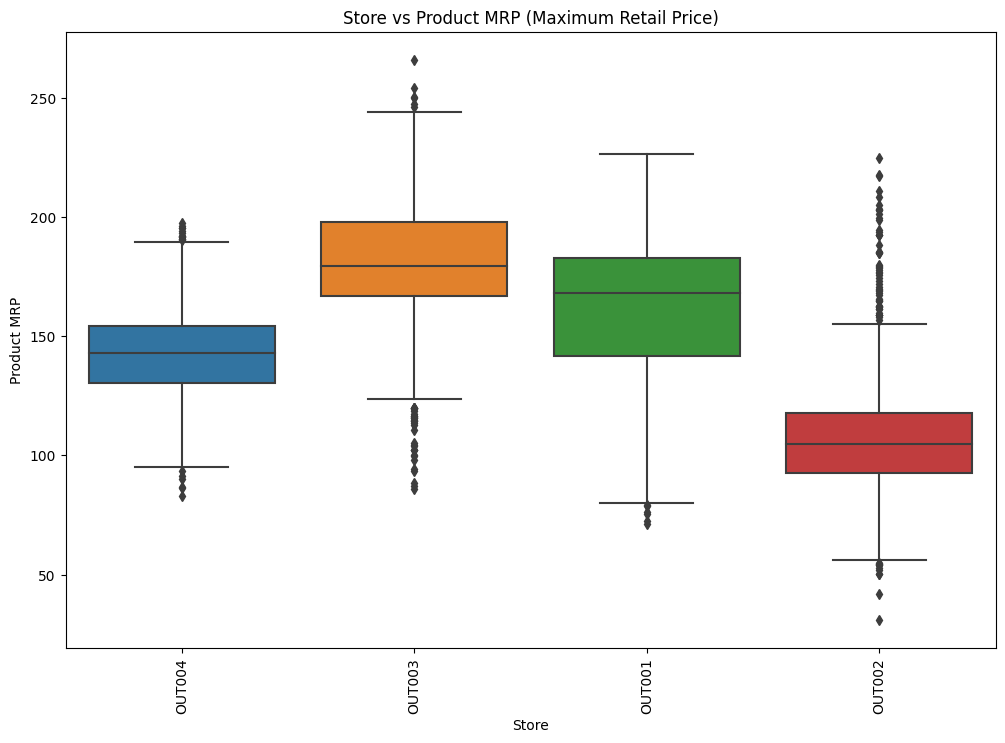

In [73]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x="Store_Id", y="Product_MRP")
plt.xticks(rotation=90)
plt.title("Store vs Product MRP (Maximum Retail Price)")
plt.xlabel("Store")
plt.ylabel("Product MRP")
plt.show()

Observation:

•	The box plot illustrates the distribution of maximum retail prices ("Product_MRP") across different stores ("Store_Id").

•	Each store has its own distribution of product prices, with varying interquartile ranges (IQRs) and median prices.

•	OUT003 have higher median prices compared to others, indicating potential differences in pricing strategies or product offerings.

•	Certain stores show wider IQRs, suggesting more variability in product prices within those stores.

•	Outliers are visible in OUT003, indicating specific products with significantly higher prices compared to the rest.


####Let's delve deeper and do a detailed analysis of each of the stores

### OUT001

In [74]:
data.loc[data["Store_Id"] == "OUT001"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1586.00000,NaN,NaN,NaN,13.45887,2.06497,6.16000,12.05250,13.96000,14.95000,17.97000
Product_Sugar_Content,1586,3,Low Sugar,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1586.00000,NaN,NaN,NaN,0.06877,0.04713,0.00400,0.03300,0.05650,0.09400,0.29500
Product_Type,1586,16,Snack Foods,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1586.00000,NaN,NaN,NaN,160.51405,30.35906,71.35000,141.72000,168.32000,182.93750,226.59000
Store_Id,1586,1,OUT001,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1586.00000,NaN,NaN,NaN,1987.00000,0.00000,1987.00000,1987.00000,1987.00000,1987.00000,1987.00000
Store_Size,1586,1,High,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1586,1,Tier 2,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1586,1,Supermarket Type1,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
data.loc[data["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum()

6223113.18

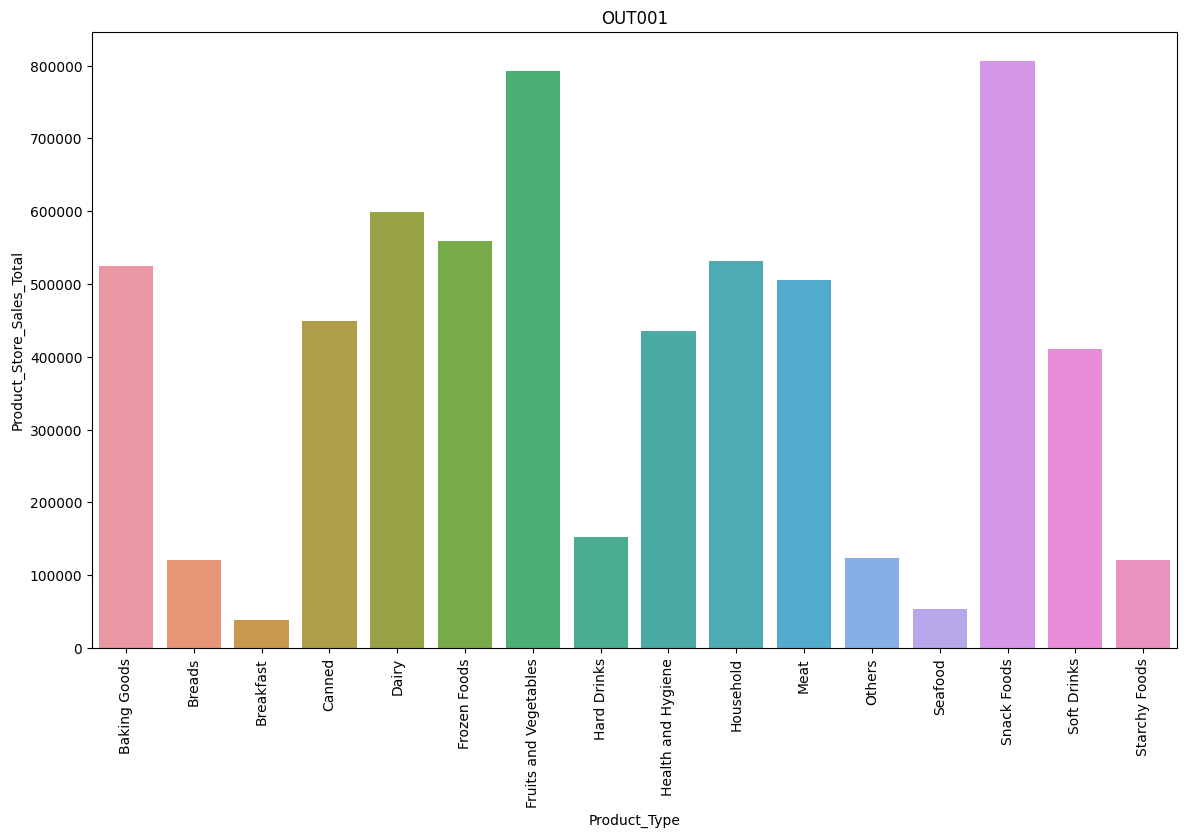

In [76]:
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT001"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT001")
sns.barplot(x=df_OUT001.Product_Type, y=df_OUT001.Product_Store_Sales_Total)
plt.show()

###OUT002

In [77]:
data.loc[data["Store_Id"] == "OUT002"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1152.00000,NaN,NaN,NaN,9.91124,1.79985,4.00000,8.76750,9.79500,10.89000,19.82000
Product_Sugar_Content,1152,3,Low Sugar,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1152.00000,NaN,NaN,NaN,0.06775,0.04757,0.00600,0.03100,0.05450,0.09525,0.29200
Product_Type,1152,16,Fruits and Vegetables,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1152.00000,NaN,NaN,NaN,107.08063,24.91233,31.00000,92.82750,104.67500,117.81750,224.93000
Store_Id,1152,1,OUT002,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1152.00000,NaN,NaN,NaN,1998.00000,0.00000,1998.00000,1998.00000,1998.00000,1998.00000,1998.00000
Store_Size,1152,1,Small,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1152,1,Tier 3,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1152,1,Food Mart,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
data.loc[data["Store_Id"] == "OUT002", "Product_Store_Sales_Total"].sum()

2030909.72

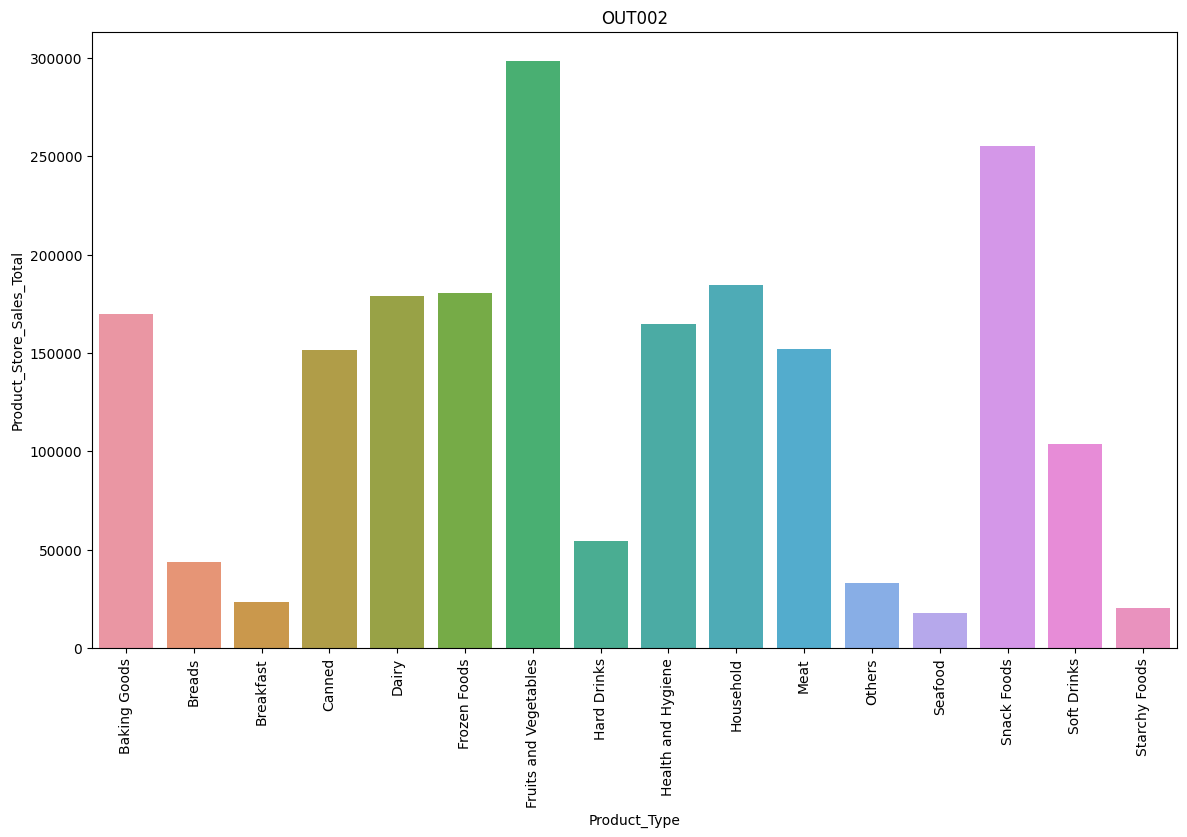

In [79]:
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT002"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT002")
sns.barplot(x=df_OUT001.Product_Type, y=df_OUT001.Product_Store_Sales_Total)
plt.show()

###OUT003

In [80]:
data.loc[data["Store_Id"] == "OUT003"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1349.00000,NaN,NaN,NaN,15.10369,1.89353,7.35000,14.02000,15.18000,16.35000,22.00000
Product_Sugar_Content,1349,3,Low Sugar,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1349.00000,NaN,NaN,NaN,0.06864,0.04871,0.00400,0.03100,0.05700,0.09400,0.29800
Product_Type,1349,16,Snack Foods,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1349.00000,NaN,NaN,NaN,181.35872,24.79643,85.88000,166.92000,179.67000,198.07000,266.00000
Store_Id,1349,1,OUT003,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1349.00000,NaN,NaN,NaN,1999.00000,0.00000,1999.00000,1999.00000,1999.00000,1999.00000,1999.00000
Store_Size,1349,1,Medium,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1349,1,Tier 1,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1349,1,Departmental Store,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
data.loc[data["Store_Id"] == "OUT003", "Product_Store_Sales_Total"].sum()

6673457.57

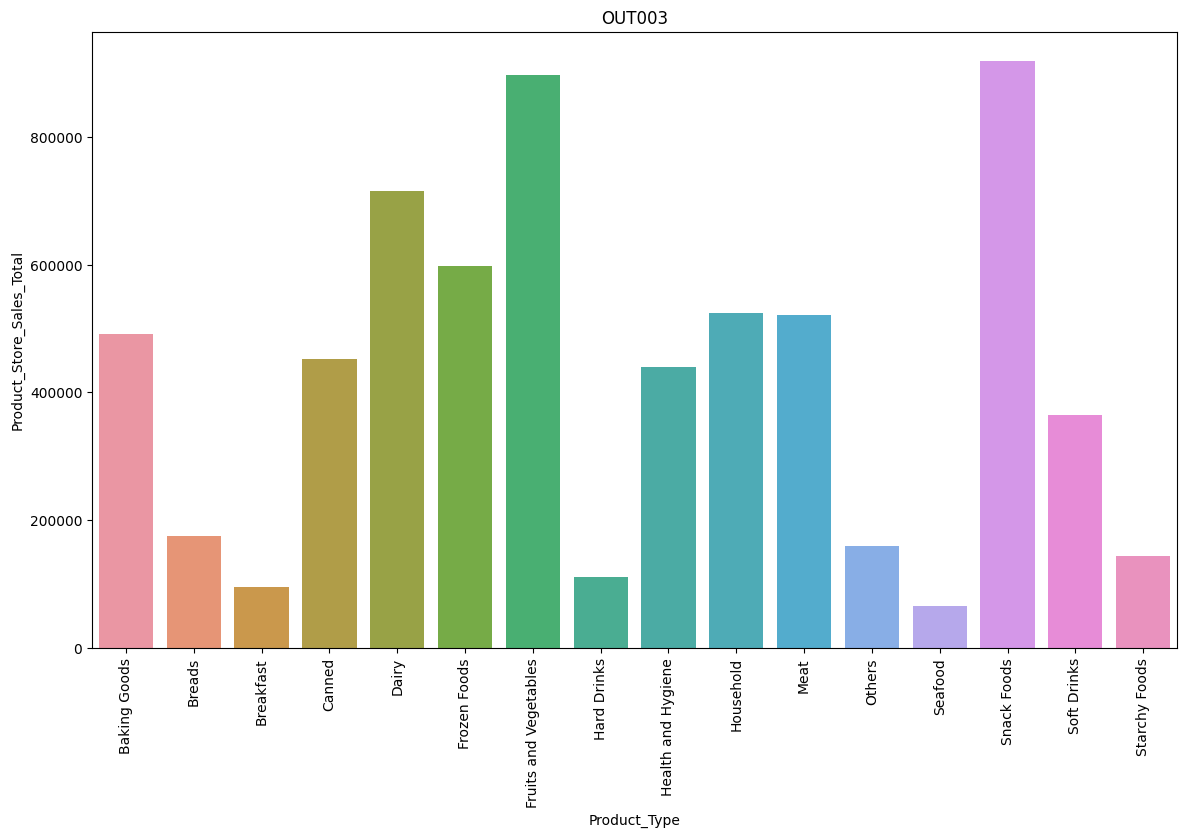

In [82]:
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT003"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT003")
sns.barplot(x=df_OUT001.Product_Type, y=df_OUT001.Product_Store_Sales_Total)
plt.show()

###OUT004

In [83]:
data.loc[data["Store_Id"] == "OUT004"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,4676.00000,NaN,NaN,NaN,12.34961,1.42820,7.34000,11.37000,12.37000,13.30250,17.79000
Product_Sugar_Content,4676,3,Low Sugar,2632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,4676.00000,NaN,NaN,NaN,0.06909,0.04858,0.00400,0.03100,0.05600,0.09700,0.29700
Product_Type,4676,16,Fruits and Vegetables,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,4676.00000,NaN,NaN,NaN,142.39971,17.51397,83.04000,130.54000,142.82000,154.19250,197.66000
Store_Id,4676,1,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,4676.00000,NaN,NaN,NaN,2009.00000,0.00000,2009.00000,2009.00000,2009.00000,2009.00000,2009.00000
Store_Size,4676,1,Medium,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,4676,1,Tier 2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,4676,1,Supermarket Type2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
data.loc[data["Store_Id"] == "OUT004", "Product_Store_Sales_Total"].sum()

15427583.43

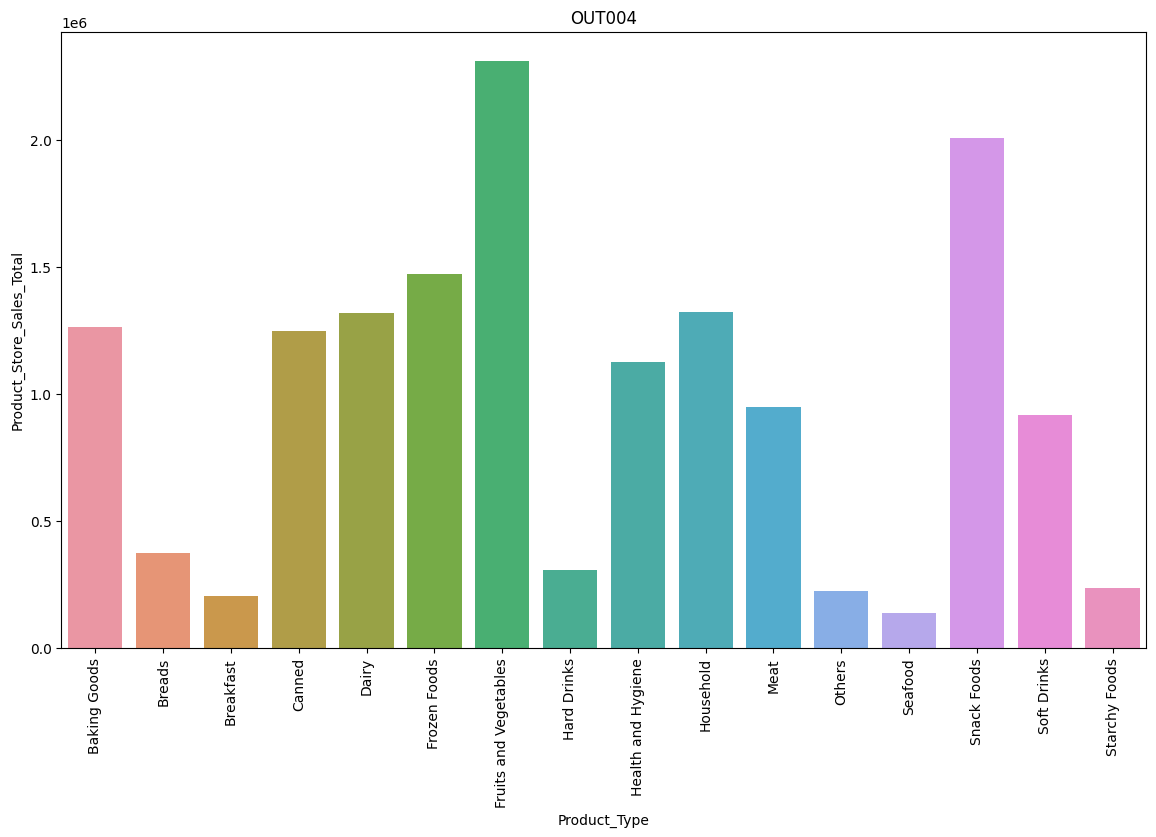

In [85]:
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT004"]
    .groupby(["Product_Type"], as_index=False)["Product_Store_Sales_Total"]
    .sum()
)
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT004")
sns.barplot(x=df_OUT001.Product_Type, y=df_OUT001.Product_Store_Sales_Total)
plt.show()

####Let's find out the revenue generated by the stores from each of the product types

In [86]:
df1 = data.groupby(["Product_Type", "Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
df1

,Product_Type,Store_Id,Product_Store_Sales_Total
0,Baking Goods,OUT001,525131.04000
1,Baking Goods,OUT002,169860.50000
2,Baking Goods,OUT003,491908.20000
3,Baking Goods,OUT004,1266086.26000
4,Breads,OUT001,121274.09000
5,Breads,OUT002,43419.47000
6,Breads,OUT003,175391.93000
7,Breads,OUT004,374856.75000
8,Breakfast,OUT001,38161.10000
9,Breakfast,OUT002,23396.10000


## Data Preprocessing

- Missing value treatment (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [87]:
# Checking for missing values
data.isnull().sum()

Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
Product_Id_char              0
dtype: int64

Observations:

There are no missing values in the data.

In [88]:
# get the summary statistics of the numerical data
data.describe()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total
count,8763.00000,8763.00000,8763.00000,8763.00000,8763.00000
mean,12.65379,0.06879,147.03254,2002.03275,3464.00364
std,2.21732,0.04820,30.69411,8.38838,1065.63049
min,4.00000,0.00400,31.00000,1987.00000,33.00000
25%,11.15000,0.03100,126.16000,1998.00000,2761.71500
50%,12.66000,0.05600,146.74000,2009.00000,3452.34000
75%,14.18000,0.09600,167.58500,2009.00000,4145.16500
max,22.00000,0.29800,266.00000,2009.00000,8000.00000


## Feature Engineering

**A store which has been in the business for a long duration is more trustworthy than the newly established ones. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.**

In [89]:
data["Store_Age_Years"] = 2021 - data["Store_Establishment_Year"]

In [90]:
print(data["Store_Age_Years"])

0       12
1       22
2       34
3       34
4       23
        ..
8758    12
8759    12
8760    34
8761    34
8762    23
Name: Store_Age_Years, Length: 8763, dtype: int64


**We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.**

In [91]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [92]:
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"


data.Product_Type.apply(change)

0       Non Perishables
1           Perishables
2       Non Perishables
3       Non Perishables
4       Non Perishables
             ...       
8758    Non Perishables
8759    Non Perishables
8760    Non Perishables
8761    Non Perishables
8762    Non Perishables
Name: Product_Type, Length: 8763, dtype: object

In [93]:
change1 = []
for i in range(0, len(data)):
    if data.Product_Type[i] in perishables:
        change1.append("Perishables")
    else:
        change1.append("Non Perishables")

In [94]:
data["Product_Type_Category"] = pd.Series(change1)

In [95]:
print(data["Product_Type_Category"])

0       Non Perishables
1           Perishables
2       Non Perishables
3       Non Perishables
4       Non Perishables
             ...       
8758    Non Perishables
8759    Non Perishables
8760    Non Perishables
8761    Non Perishables
8762    Non Perishables
Name: Product_Type_Category, Length: 8763, dtype: object


In [96]:
data.head

<bound method NDFrame.head of       Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0           12.66000             Low Sugar                 0.02700   
1           16.54000             Low Sugar                 0.14400   
2           14.28000               Regular                 0.03100   
3           12.10000             Low Sugar                 0.11200   
4            9.57000              No Sugar                 0.01000   
...              ...                   ...                     ...   
8758        14.80000              No Sugar                 0.01600   
8759        14.06000              No Sugar                 0.14200   
8760        13.48000              No Sugar                 0.01700   
8761        13.89000              No Sugar                 0.19300   
8762        14.73000             Low Sugar                 0.17700   

            Product_Type  Product_MRP Store_Id  Store_Establishment_Year  \
0           Frozen Foods    117.08000   OUT004       

###Outlier check

Lets check of the outliers in data.

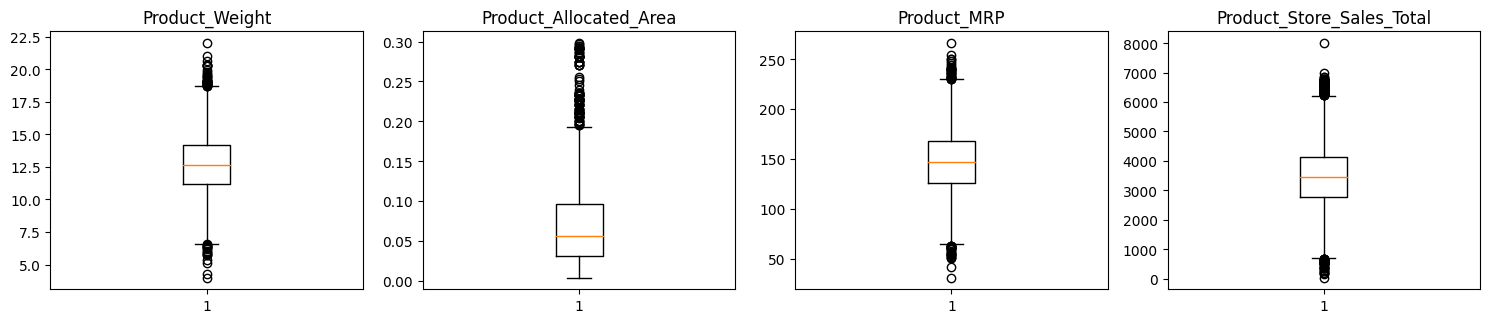

In [97]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Product MRP and Product weight has some outliers.

###**Data Preparation for modeling**

- We want to forecast the Product_Store_Sales_Total.
- Before we proceed to build a model, we'll have to encode categorical features and drop the unnecessary columns
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [98]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66000,Low Sugar,0.02700,Frozen Foods,117.08000,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40000,FD,12,Non Perishables
1,16.54000,Low Sugar,0.14400,Dairy,171.43000,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02000,FD,22,Perishables
2,14.28000,Regular,0.03100,Canned,162.08000,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16000,FD,34,Non Perishables
3,12.10000,Low Sugar,0.11200,Baking Goods,186.31000,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18000,FD,34,Non Perishables
4,9.57000,No Sugar,0.01000,Health and Hygiene,123.67000,OUT002,1998,Small,Tier 3,Food Mart,2279.36000,NC,23,Non Perishables


Dropping Unnecessary Columns:

Befor we move forward lets consider dropping columns that are not needed for modeling, such as Product_Type, Store_Id, and Store_Establishment_Year.

In [99]:
print(data.columns)

Index(['Product_Weight', 'Product_Sugar_Content', 'Product_Allocated_Area',
       'Product_Type', 'Product_MRP', 'Store_Id', 'Store_Establishment_Year',
       'Store_Size', 'Store_Location_City_Type', 'Store_Type',
       'Product_Store_Sales_Total', 'Product_Id_char', 'Store_Age_Years',
       'Product_Type_Category'],
      dtype='object')


In [100]:
data = data.drop(columns=['Product_Type', 'Store_Id', 'Store_Establishment_Year'])

In [101]:
data.shape

(8763, 11)

In [102]:
data = pd.get_dummies(
    data,
    columns=data.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

In [103]:
data.head()

,Product_Weight,Product_Allocated_Area,Product_MRP,Product_Store_Sales_Total,Store_Age_Years,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Id_char_FD,Product_Id_char_NC,Product_Type_Category_Perishables
0,12.66000,0.02700,117.08000,2842.40000,12,0,0,1,0,1,0,0,0,1,1,0,0
1,16.54000,0.14400,171.43000,4830.02000,22,0,0,1,0,0,0,0,0,0,1,0,1
2,14.28000,0.03100,162.08000,4130.16000,34,0,1,0,0,1,0,0,1,0,1,0,0
3,12.10000,0.11200,186.31000,4132.18000,34,0,0,0,0,1,0,0,1,0,1,0,0
4,9.57000,0.01000,123.67000,2279.36000,23,1,0,0,1,0,1,1,0,0,0,1,0


In [104]:
# Droping the target colum and # Keeping the target column

In [105]:
X = data.drop("Product_Store_Sales_Total", axis=1)
y = data["Product_Store_Sales_Total"]

In [106]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, shuffle=True
)

In [107]:
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

      Product_Weight  Product_Allocated_Area  Product_MRP  Store_Age_Years  \
910         11.73000                 0.07100    132.08000               12   
7022        11.61000                 0.06200    150.70000               12   
8056        11.30000                 0.03900    102.35000               23   
2939        12.55000                 0.09500    139.35000               12   
68          12.95000                 0.07600    155.55000               12   

      Product_Sugar_Content_No Sugar  Product_Sugar_Content_Regular  \
910                                0                              1   
7022                               0                              1   
8056                               0                              0   
2939                               0                              0   
68                                 0                              1   

      Store_Size_Medium  Store_Size_Small  Store_Location_City_Type_Tier 2  \
910                   1   

In [108]:
X_train.shape, X_test.shape

((6134, 16), (2629, 16))

Train data set has 6134 rows and test has 2629 rows. Both have same number of columns.

In [109]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
3511.58000   0.00049
2927.84000   0.00033
2996.63000   0.00033
3890.84000   0.00033
3069.02000   0.00033
               ...  
2864.96000   0.00016
4116.93000   0.00016
2401.99000   0.00016
3944.70000   0.00016
5060.34000   0.00016
Name: Product_Store_Sales_Total, Length: 6081, dtype: float64
Percentage of classes in test set:
3243.32000   0.00076
3518.75000   0.00076
3647.05000   0.00076
4487.29000   0.00076
5368.35000   0.00076
               ...  
3577.24000   0.00038
4897.16000   0.00038
4331.39000   0.00038
4410.43000   0.00038
3535.71000   0.00038
Name: Product_Store_Sales_Total, Length: 2620, dtype: float64


###**Model Building - Strategy and Evaluation**

In [110]:
from sklearn.metrics import r2_score, mean_squared_error

In [111]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf



In [112]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_r2 = metrics.r2_score(y_train, pred_train)
    test_r2 = metrics.r2_score(y_test, pred_test)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_test))

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:
        print("R-sqaure on training set : ", metrics.r2_score(y_train, pred_train))
        print("R-square on test set : ", metrics.r2_score(y_test, pred_test))
        print(
            "RMSE on training set : ",
            np.sqrt(metrics.mean_squared_error(y_train, pred_train)),
        )
        print(
            "RMSE on test set : ",
            np.sqrt(metrics.mean_squared_error(y_test, pred_test)),
        )

    # returning the list with train and test scores
    return score_list


###**Decision Tree - Model Building and Hyperparameter Tuning**

###**Decision Tree Model**

In [113]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Your function to calculate scores
def get_model_score(model, flag=True):
    """
    Your function code here
    """
    # ...

    # Using r2_score and mean_squared_error directly
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, pred_test))

    # ...



In [114]:
from sklearn.tree import DecisionTreeRegressor

# Create the Decision Tree Regressor
dtree = DecisionTreeRegressor(random_state=1)

# Fit the model to your training data
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [115]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

###**Checking model performance on training set**

In [116]:
dtree_model_train_perf = model_performance_regression(dtree, X_train, y_train)
dtree_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.00000,0.00000,1.00000,1.00000,0.00000


OBSERVATION:

The key observation here is that the model is performing perfectly on the training data, with all metrics (RMSE, MAE, R-squared, and MAPE) indicating no errors or discrepancies between predictions and actual values.

However, this might indicate overfitting, where the model is not generalize well to unseen data. It's essential to evaluate the model on a separate test dataset to ensure its performance is reliable on the training data.

###**Checking model performance on test set**

In [117]:
dtree_model_test_perf = model_performance_regression(dtree, X_test, y_test)
dtree_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,379.99566,133.53048,0.87382,0.87304,5.64304


OBSERVATION:
The lower the RMSE, MAE, and MAPE, and the higher the R-squared and Adjusted R-squared, the better the model's predictive performance.

R2 is 87.38%

###**Hyperparameter Tuning - Decision Tree Model**

In [118]:
# Import necessary libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split


In [119]:
# Import necessary libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split

# ... (assuming you've loaded and preprocessed your data)

# Choose the type of classifier.
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": list(np.arange(1, 9)) + [None],
    "min_samples_leaf": [1, 3, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15] + [None],
    "min_impurity_decrease": [0.001, 0.01, 0.1, 0.0],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(min_impurity_decrease=0.001, min_samples_leaf=10,
                      random_state=1)

Hyperparameter tuning involves finding the best set of hyperparameters for a machine learning model.

In [120]:
# Choose the type of classifier.
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": list(np.arange(1, 9)) + [None],
    "min_samples_leaf": [1, 3, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15] + [None],
    "min_impurity_decrease": [0.001, 0.01, 0.1, 0.0],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(min_impurity_decrease=0.001, min_samples_leaf=10,
                      random_state=1)

In [121]:
dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [122]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### **Checking model performance on training set**

In [123]:
dtree_tuned_model_train_perf = model_performance_regression(
    dtree_tuned, X_train, y_train
)
dtree_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,249.39754,109.74403,0.94503,0.94489,3.87820


The lower the RMSE, MAE, and MAPE, and the higher the R-squared and Adjusted R-squared, the better the model's predictive performance.

R2 increased to 94.45% and other values are dropped. Model looks good than previous modelon train data.

#### **Checking model performance on test set**

In [124]:
dtree_tuned_model_test_perf = model_performance_regression(dtree, X_test, y_test)
dtree_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,379.99566,133.53048,0.87382,0.87304,5.64304


The lower the RMSE, MAE, and MAPE, and the higher the R-squared and Adjusted R-squared, the better the model's predictive performance.

Values are same as the model that wa not tuned.



###**Building bagging and boosting models**

###**Bagging - Model Building and Hyperparameter Tuning**

###Bagging Regressor

In [125]:
from sklearn.ensemble import BaggingRegressor

# Define the Bagging Regressor
bagging_regressor = BaggingRegressor(random_state=1)

# Fit the model on the train data
bagging_regressor.fit(X_train, y_train)
bagging_regressor = BaggingRegressor(random_state=1)

#### **Checking model performance on training set**

In [126]:
bagging_regressor_model_train_perf = model_performance_regression(dtree, X_train, y_train)
bagging_regressor_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.00000,0.00000,1.00000,1.00000,0.00000


Scores are all perfect on train data.

### **Checking model performance on test set**

In [127]:
bagging_regressor_model_test_perf = model_performance_regression(dtree, X_test, y_test)
bagging_regressor_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,379.99566,133.53048,0.87382,0.87304,5.64304


 MAPE: The MAPE value of 5.64304% suggests that, on average, the model's predictions have an absolute percentage error of about 5.64% on the test data.

 The model is performing with a certain level of error on the test data. Evaluating and comparing these metrics will help make decisions about the model's suitability for your problem and whether further improvements are needed.

##  Will tuning the hyperparameters improve the model performance?

In [128]:
# Choose the type of regressor.
bagging_estimator_tuned = BaggingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": np.arange(90, 120, 10),
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingRegressor(max_features=0.9, max_samples=0.8, n_estimators=110,
                 random_state=1)

#### **Checking model performance on training set**

In [129]:
# Calculate model performance on training set using the tuned bagging estimator
bagging_estimator_tuned_model_train_perf = model_performance_regression(bagging_estimator_tuned, X_train, y_train)
bagging_estimator_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,136.86651,76.87432,0.98344,0.98340,2.73651


#### **Checking model performance on test set**

In [130]:
# Calculate model performance on test set using the tuned bagging estimator
bagging_estimator_tuned_model_test_perf = model_performance_regression(bagging_estimator_tuned, X_test, y_test)
bagging_estimator_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,315.64122,172.52500,0.91294,0.91240,7.30997


In this we could see bagging estimator has achieved a reasonable performance on the test set. The relatively low RMSE and MAE values, as well as the high R-squared and adjusted R-squared values, indicate that the model's predictions are in good agreement with the actual target values.

### **Random Forest Model**

In [131]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest regressor
rf_estimator = RandomForestRegressor(random_state=1)

# Fit the regressor to the training data
rf_estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

#### **Checking model performance on training set**

In [132]:
# Calculate model performance on training set using the Random Forest regressor
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,104.30010,39.57444,0.99039,0.99036,1.40069


The R-squared and Adjusted R-squared values are both close to 1, indicating that the model explains a significant portion (approximately 99.03%) of the variance in the target variable. This suggests that the model fits the data well and captures the underlying patterns.   

The MAPE value of 1.40% suggests that, on average, the model's predictions have an absolute percentage error of about 1.45% on the train data.

#### **Checking model performance on test set**

In [133]:
# Calculate model performance on test set using the Random Forest regressor
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,297.96279,112.81755,0.92242,0.92194,5.05262


The R-squared and Adjusted R-squared values are both close to 1, indicating that the model explains a significant portion (approximately 92.19%) of the variance in the target variable. This suggests that the model fits the data well and captures the underlying patterns.   

The MAPE value of 5.05% suggests that, on average, the model's predictions have an absolute percentage error of about 1.45% on the test data.

### **Hyperparameter Tuning - Random Forest**

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

# Choose the type of regressor.
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [4, 6, 8, 10, None],
    "max_features": ["sqrt", "log2", None],
    "n_estimators": [80, 90, 100, 110, 120],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf_tuned to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=None, n_estimators=120,
                      random_state=1)

###**Checking model performance on training set**

In [135]:
# Calculate model performance on training set using the tuned Random Forest regressor
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,188.11504,75.93370,0.96873,0.96864,2.52053


The R-squared and Adjusted R-squared values are both close to 1, indicating that the model explains a significant portion (approximately 96.84%) of the variance in the target variable. This suggests that the model fits the data well and captures the underlying patterns.

The MAPE value of 5.05% suggests that, on average, the model's predictions have an absolute percentage error of about 5% on the train data.


#### **Checking model performance on test set**

In [136]:
# Calculate model performance on test set using the tuned Random Forest regressor
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,292.97744,116.63039,0.92499,0.92453,5.17422


The R-squared and Adjusted R-squared values are both close to 1, indicating that the model explains a significant portion (approximately 92.45%) of the variance in the target variable. This suggests that the model fits the data well and captures the underlying patterns.

The MAPE value of 5.17% suggests that, on average, the model's predictions have an absolute percentage error of about 5.17% on the test data.

## **Boosting - Model Building and Hyperparameter Tuning**

### AdaBoost Regressor

In [137]:
from sklearn.ensemble import AdaBoostRegressor

# Define the AdaBoost Regressor
ab_regressor = AdaBoostRegressor(random_state=1)

# Fit the regressor to the training data
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

#### **Checking model performance on training set**

In [138]:
ab_regressor_model_train_perf = model_performance_regression(ab_regressor, X_train, y_train)
ab_regressor_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,497.62880,394.54116,0.78114,0.78057,13.17746


The R-squared (Accuracy) = 78%

The MAPE value =  13.17 suggests that, on average, the model's predictions have an absolute percentage error of about 13.17% on the train data.

#### **Checking model performance on test set**

In [139]:
ab_regressor_model_test_perf = model_performance_regression(ab_regressor, X_test, y_test)
ab_regressor_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,497.62880,394.54116,0.78114,0.78057,13.17746


This Adaboost Regressors model is performing on the test data. The lower the RMSE and MAE values and the higher the R-squared and Adjusted R-squared values, the better the model's performance.

The R-squared (Accuracy) = 76%

The MAPE value =  13.70 suggests that, on average, the model's predictions have an absolute percentage error of about 13.70% on the train data.


### **Hyperparameter Tuning - AdaBoost Regressor**

In [140]:
# Choose the type of classifier.
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10, 100, 10),
    "learning_rate": [1, 0.1, 0.5, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer =make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)


AdaBoostRegressor(learning_rate=0.5, n_estimators=10, random_state=1)

#### **Checking model performance on training set**

In [141]:
ab_tuned_model_train_perf = model_performance_regression(ab_tuned, X_train, y_train)
ab_tuned_model_train_perf


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,459.20943,351.37985,0.81363,0.81315,11.89027


The R-squared (Accuracy) = 81%

The MAPE value = 11.89 suggests that, on average, the model's predictions have an absolute percentage error of about 11.89% on the train data.

####**Checking model performance on test set**

In [142]:
ab_tuned_model_test_perf = model_performance_regression(ab_tuned, X_test, y_test)
ab_tuned_model_test_perf


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,485.11246,366.48826,0.79435,0.79309,14.03313


The R-squared (Accuracy) = 79%

The MAPE value = 14 suggests that, on average, the model's predictions have an absolute percentage error of about 14% on the train data.

###**Gradient Boosting Regressor**

In [143]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
gb_estimator = GradientBoostingRegressor(random_state=1)

# Fit the regressor to the training data
gb_estimator.fit(X_train, y_train)


GradientBoostingRegressor(random_state=1)

#### **Checking model performance on training set**

In [144]:
gb_estimator_model_train_perf = model_performance_regression(gb_estimator, X_train, y_train)
gb_estimator_model_train_perf


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,298.46684,141.70406,0.92127,0.92106,5.06585


#### **Checking model performance on test set**

In [145]:
gb_estimator_model_test_perf = model_performance_regression(gb_estimator, X_test, y_test)
gb_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,328.08214,155.04979,0.90594,0.90536,6.58411


Train Data:
The R-squared (Accuracy) = 92%

The MAPE value =The model's predictions have an absolute percentage error of about 5% on the train data.

Test Data:
The R-squared (Accuracy) = 90%

The MAPE value =The model's predictions have an absolute percentage error of about 6.58% on the train data.

### **Hyperparameter Tuning - Gradient Boosting Regressor**

In [146]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

# Choose the type of classifier.
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50, 200, 25),
    "subsample": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "max_depth": [3, 5, 7, 10],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search with cv = 5
grid_obj = GridSearchCV(estimator=gb_tuned, param_grid=parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)



GradientBoostingRegressor(max_depth=7, max_features=0.7, n_estimators=50,
                          random_state=1, subsample=0.8)

Took 30 minutes to run.

#### **Checking model performance on training set**

In [147]:
gb_tuned_model_train_perf = model_performance_regression(gb_tuned, X_train, y_train)
gb_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,185.75744,75.11817,0.96950,0.96942,2.41315


#### **Checking model performance on test set**

In [148]:
gb_tuned_model_test_perf = model_performance_regression(gb_tuned, X_test, y_test)
gb_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,294.74517,117.27381,0.92408,0.92362,5.07931


Gradient Boosting Regressor Statistics:

Train Data:
The R-squared (Accuracy) = 97%

The MAPE value =The model's predictions have an absolute percentage error of about 2.41% on the train data.

Test Data:
The R-squared (Accuracy) = 92%

The MAPE value =The model's predictions have an absolute percentage error of about 5.07% on the train data.

### **XGBoost Regressor**

In [149]:
from xgboost import XGBRegressor

# Create an XGBoost Regressor
xgb_estimator = XGBRegressor(random_state=1)

# Fit the regressor to the training data
xgb_estimator.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

#### **Checking model performance on training set**

In [150]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X_train, y_train)
xgb_estimator_model_train_perf


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,126.62695,59.53365,0.98583,0.98579,1.98315


#### **Checking model performance on test set**

In [151]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, X_test, y_test)
xgb_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,307.60724,131.20861,0.91731,0.91681,5.70419


XG Boot Regressor Statistics:

Train Data:
The R-squared (Accuracy) = 98.5%

The MAPE value =The model's predictions have an absolute percentage error of about 1.98% on the train data.

Test Data:
The R-squared (Accuracy) = 91.68

The MAPE value =The model's predictions have an absolute percentage error of about 5.70% on the train data.

### Hyperparameter Tuning - XGBoost Regressor

In [152]:
# Choose the type of classifier.
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [75, 100, 125, 150],
    "subsample": [0.7, 0.8, 0.9, 1],
    "gamma": [0, 1, 3, 5],
    "colsample_bytree": [0.7, 0.8, 0.9, 1],
    "colsample_bylevel": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=None, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=75, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for GradientBoostingRegressor
gb_param_grid = {
    "n_estimators": [100, 150],
    "subsample": [0.8, 1],
    "max_features": [0.8, 1],
    "max_depth": [5, 7],
}

# Create the GradientBoostingRegressor
gb_estimator = GradientBoostingRegressor(random_state=1)

# Define the parameter grid for XGBRegressor
xgb_param_grid = {
    "n_estimators": [100, 150],
    "subsample": [0.8, 1],
    "gamma": [0, 1],
    "colsample_bytree": [0.8, 1],
    "colsample_bylevel": [0.8, 1],
}

# Create the XGBRegressor
xgb_estimator = XGBRegressor(random_state=1)

# Define the scoring function
scorer = make_scorer(r2_score)

# Perform hyperparameter tuning for GradientBoostingRegressor
gb_random_search = RandomizedSearchCV(
    gb_estimator, gb_param_grid, n_iter=10, scoring=scorer, cv=5, random_state=1, n_jobs=-1
)
gb_random_search.fit(X_train, y_train)

# Perform hyperparameter tuning for XGBRegressor
xgb_random_search = RandomizedSearchCV(
    xgb_estimator, xgb_param_grid, n_iter=10, scoring=scorer, cv=5, random_state=1, n_jobs=-1
)
xgb_random_search.fit(X_train, y_train)

# Get the best estimators from the random search
best_gb_estimator = gb_random_search.best_estimator_
best_xgb_estimator = xgb_random_search.best_estimator_

# Fit the best estimators to the data
best_gb_estimator.fit(X_train, y_train)
best_xgb_estimator.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=1,
             colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

#### **Checking model performance on training set**

In [154]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,159.69068,73.00075,0.97746,0.97740,2.43385


#### **Checking model performance on test set**

In [155]:
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,303.60886,129.55211,0.91945,0.91896,5.46379


XG Boot Regressor Tuned Statistics:

Train Data:
The R-squared (Accuracy) = 91.8%

The MAPE value =The model's predictions have an absolute percentage error of about 5.46% on the train data.

Test Data:
The R-squared (Accuracy) = 91.94

The MAPE value =The model's predictions have an absolute percentage error of about 5.46% on the train data.

### **Stacking Model**

 let's build a stacking model using the tuned decision tree, random forest, and gradient boosting regressors, and then use XGBoost to get the final prediction.

In [156]:
estimators = [
    ("Decision Tree", dtree_tuned),
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gb_tuned),
]
final_estimator = XGBRegressor(random_state=1)

In [157]:
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor

# Create a list of tuned regressors
tuned_regressors = [
    ('dtree', dtree_tuned),
    ('rf', rf_tuned),
    ('gb', gb_tuned)
]

# Initialize the StackingRegressor with the list of tuned regressors and the final estimator (XGBoost)
stacking_estimator = StackingRegressor(estimators=tuned_regressors, final_estimator=XGBRegressor(random_state=1), cv=5)

# Fit the stacking estimator on the training data
stacking_estimator.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('dtree',
                               DecisionTreeRegressor(min_impurity_decrease=0.001,
                                                     min_samples_leaf=10,
                                                     random_state=1)),
                              ('rf',
                               RandomForestRegressor(max_depth=10,
                                                     max_features=None,
                                                     n_estimators=120,
                                                     random_state=1)),
                              ('gb',
                               GradientBoostingRegressor(max_depth=7,
                                                         max_features=0.7,
                                                         n_estimators=50,
                                                         random_state=1,
                                                         subsample=0.8))],
                  final_estimator=X...
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None, random_state=1, ...))

 Building a stacked ensemble regression model using the StackingRegressor class.

 We have taken three initial regressors that are already tuned for better performance: a Decision Tree regressor (dtree_tuned), a Random Forest regressor (rf_tuned), and a Gradient Boosting regressor (gb_tuned).

 The final estimator is an XGBoost regressor, which will be used to combine the predictions of the initial regressors in the stacking ensemble.

The final estimator (XGBoost regressor) is trained on the predictions generated by the initial regressors. The final estimator learns to combine the predictions of the initial regressors to generate the final ensemble prediction.

Stacking model combines the strengths of multiple initial regressors by having a final estimator (XGBoost regressor) learn how to best combine their predictions to make more accurate predictions.

#### **Checking model performance on training set**

In [158]:
stacking_estimator_model_train_perf = model_performance_regression(stacking_estimator, X_train, y_train)
stacking_estimator_model_train_perf


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,219.40567,97.10365,0.95746,0.95734,3.16343


The output above represents the performance metrics of the stacking ensemble regression model (stacking_estimator) when it's evaluated on the training data

#### **Checking model performance on test set**

In [159]:
stacking_estimator_model_test_perf = model_performance_regression(stacking_estimator, X_test, y_test)
stacking_estimator_model_test_perf


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,312.88236,132.12702,0.91445,0.91393,5.05340


OBSERVATION: RMSE is approximately 312.88. A lower RMSE indicates better predictive accuracy.
The MAE is approximately 132.13.
An R-squared value of 0.91445 indicates that around 91.45% of the variance in the dependent variable is explained by the model.

The MAPE here is approximately 5.05%, which means, on average, the model's predictions are off by about 5.05% from the actual values.

## Model Performance Comparison and Conclusions

In [160]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_tuned_model_train_perf.T,
        bagging_regressor_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_regressor_model_train_perf.T,
        ab_tuned_model_train_perf.T,
        gb_estimator_model_train_perf.T,
        gb_tuned_model_train_perf.T,
        xgb_estimator_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_estimator_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Regressor",
    "Bagging Regressor Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Regressor",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Regressor,Bagging Regressor Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Regressor
RMSE,0.00000,249.39754,0.00000,136.86651,104.30010,188.11504,497.62880,459.20943,298.46684,185.75744,126.62695,159.69068,219.40567
MAE,0.00000,109.74403,0.00000,76.87432,39.57444,75.93370,394.54116,351.37985,141.70406,75.11817,59.53365,73.00075,97.10365
R-squared,1.00000,0.94503,1.00000,0.98344,0.99039,0.96873,0.78114,0.81363,0.92127,0.96950,0.98583,0.97746,0.95746
Adj. R-squared,1.00000,0.94489,1.00000,0.98340,0.99036,0.96864,0.78057,0.81315,0.92106,0.96942,0.98579,0.97740,0.95734
MAPE,0.00000,3.87820,0.00000,2.73651,1.40069,2.52053,13.17746,11.89027,5.06585,2.41315,1.98315,2.43385,3.16343


In [161]:
models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        dtree_tuned_model_test_perf.T,
        bagging_regressor_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_regressor_model_test_perf.T,
        ab_tuned_model_test_perf.T,
        gb_estimator_model_test_perf.T,
        gb_tuned_model_test_perf.T,
        xgb_estimator_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_estimator_model_test_perf.T,
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Regressor",
    "Bagging Regressor Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Regressor",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Regressor,Bagging Regressor Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Regressor
RMSE,379.99566,379.99566,379.99566,315.64122,297.96279,292.97744,517.19880,485.11246,328.08214,294.74517,307.60724,303.60886,312.88236
MAE,133.53048,133.53048,133.53048,172.52500,112.81755,116.63039,408.72407,366.48826,155.04979,117.27381,131.20861,129.55211,132.12702
R-squared,0.87382,0.87382,0.87382,0.91294,0.92242,0.92499,0.76625,0.79435,0.90594,0.92408,0.91731,0.91945,0.91445
Adj. R-squared,0.87304,0.87304,0.87304,0.91240,0.92194,0.92453,0.76482,0.79309,0.90536,0.92362,0.91681,0.91896,0.91393
MAPE,5.64304,5.64304,5.64304,7.30997,5.05262,5.17422,15.14431,14.03313,6.58411,5.07931,5.70419,5.46379,5.05340


OBSERVATION: Tuned Models vs. Decision Tree: For RMSE, MAE, and R-squared, the "Decision Tree Tuned" and the "Bagging Regressor Tuned" have similar results to the untuned "Decision Tree" and "Bagging Regressor." This could indicate that tuning did not significantly improve their performance on the unseen test data for these metrics.

Bagging Regressor Tuned: The "Bagging Regressor Tuned" outperforms the untuned version in terms of RMSE, MAE, and R-squared. This suggests that tuning has resulted in improved performance on the test data for this model.

Random Forest Tuned: The "Random Forest Tuned" performs better than the untuned "Random Forest Estimator" in terms of RMSE, MAE, and R-squared. This indicates that the tuning process has improved the model's performance on the unseen test data.

Adaboost Regressor vs. Adaboost Tuned: Similar to the training performance, the tuned "Adaboost Regressor" performs worse than the untuned version on the test data in terms of RMSE, MAE, and R-squared. This could indicate that the tuning process was not suitable for this model on this dataset.

Gradient Boost Tuned: The "Gradient Boost Tuned" performs slightly better than the untuned "Gradient Boost Estimator" in terms of RMSE and MAE, indicating that tuning has had a positive impact on test data performance.

XGBoost Tuned: The tuned "XGB Tuned" model's performance on test data is comparable to the untuned "XGBoost" model, with similar RMSE, MAE, and R-squared values.

Stacking Regressor: The stacking ensemble ("Stacking Regressor") performs with intermediate metrics on the test data. Its RMSE, MAE, and MAPE values are relatively higher compared to the best-performing individual models like Random Forest, Gradient Boosting, and XGBoost.

R-squared and Adj. R-squared: For most models, the R-squared and adjusted R-squared values are relatively high, indicating good model fit to the test data. However, the values for some tuned models are slightly lower compared to their untuned counterparts.

MAPE: The Mean Absolute Percentage Error (MAPE) values are generally low across the models, indicating that the models are making accurate predictions on average, with a low percentage error.

**Best Model**: Random Forest Tuned

This model has best accuracy with low percentage error.

RMSE: 292.97744
MAE: 116.63039
R-squared: 0.92499
MAPE: 5.17422

### Important features of the best model

Lets run important features on the model selected - Random Forest Tuned.

In [164]:
print(
    pd.DataFrame(
        rf_tuned.feature_importances_,
        columns=["Imp"],
        index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                                      Imp
Product_MRP                       0.39681
Store_Location_City_Type_Tier 2   0.11306
Store_Type_Food Mart              0.10386
Product_Weight                    0.10101
Store_Size_Small                  0.09972
Store_Location_City_Type_Tier 3   0.08675
Store_Type_Supermarket Type2      0.04752
Store_Age_Years                   0.03441
Product_Allocated_Area            0.00533
Store_Type_Supermarket Type1      0.00471
Store_Size_Medium                 0.00439
Product_Type_Category_Perishables 0.00054
Product_Sugar_Content_No Sugar    0.00050
Product_Sugar_Content_Regular     0.00049
Product_Id_char_FD                0.00048
Product_Id_char_NC                0.00044


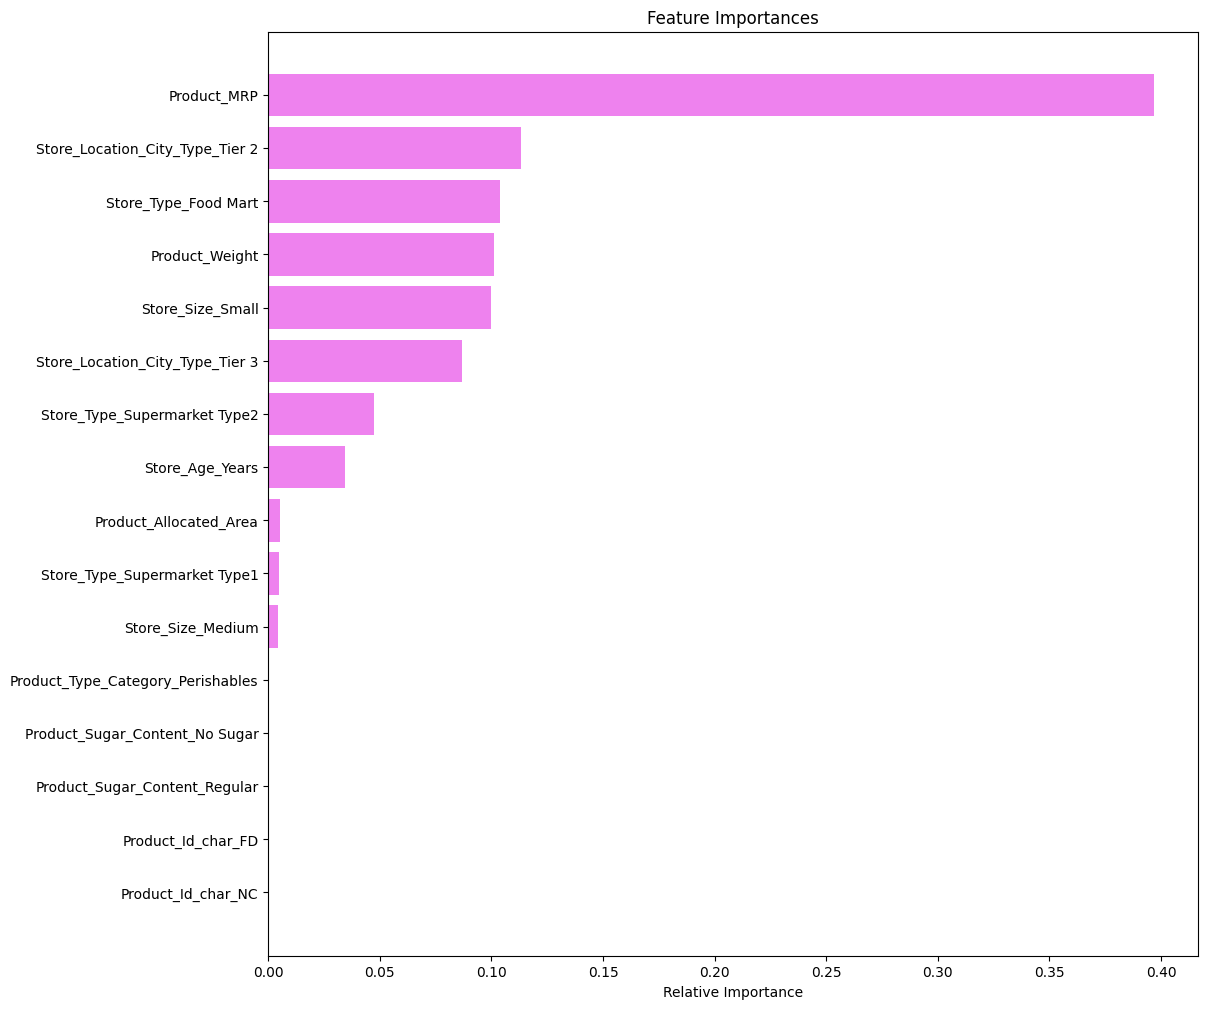

In [165]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_  # Replace 'xgb_tuned' with the variable name of your XGBoost model
indices = np.argsort(importances)


plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**OBSERVATIONS:**

Product_MRP: This feature has the highest importance score (0.39681). This suggests that the product's Maximum Retail Price (MRP) is a significant driver of the target variable and has the most influence on the model's predictions.

Store_Location_City_Type_Tier 2: This feature has a relatively high importance score (0.11306), indicating that being in a Tier 2 city type has a noticeable impact on the predictions.

Store_Type_Food Mart: The store type "Food Mart" is also considered important (0.10386) in making predictions.

Product_Weight: The weight of the product (0.10101) is another influential feature for the model.

Store_Size_Small: The size of the store being "Small" (0.09972) contributes significantly to the model's predictions.

Store_Location_City_Type_Tier 3: Store location being in a Tier 3 city type (0.08675) is important for predictions.

Store_Type_Supermarket Type2: The presence of "Supermarket Type2" (0.04752) as the store type is also relevant.

Store_Age_Years: The age of the store (0.03441) has a moderate influence on predictions.

Product_Sugar_Content_No Sugar and Product_Sugar_Content_Regular: These sugar content categories have relatively low importances (0.00050 and 0.00049).

Product_Id_char_FD and Product_Id_char_NC: The product ID characters "FD" and "NC" (0.00048 and 0.00044) have the least influence on predictions.

## Actionable Insights and Recommendations

Select Model: Random Forest Tuned

RMSE: 292.97744
MAE: 116.63039
R-squared: 0.92499
MAPE: 5.17422

**Actionable Insights:**

Promising Performance: The "Random Forest Tuned" model shows promising performance across various metrics, including RMSE, MAE, R-squared, and MAPE. It outperforms many other models in the comparison and demonstrates its ability to accurately predict the target variable.

With a high R-squared value of 0.92499, the model effectively explains around 92.5% of the variance in the target variable. This suggests strong potential for the model to generalize well to unseen data.

Low MAPE: The Mean Absolute Percentage Error (MAPE) of 5.17422 indicates that, on average, the model's predictions are off by about 5.17% from the actual values. This level of accuracy can be valuable for decision-making in various applications.

Feature Importance: Most influential features that drive predictions are product MRP, Location Tier, Product Weight, Store size, Store type. Product sugar content has least influence.

Business Context: Since it's a financial predictions, low MAPE is crucial for , the "Random Forest Tuned" model's accuracy align well with the requirements.


Model Deployment: If the "Random Forest Tuned" model consistently performs well across various evaluation metrics and aligns with the business goals, consider deploying it in a real-world setting.

Regular Monitoring: Continuously monitor the model's performance on new data in a production environment. Evaluate whether it maintains its accuracy and adjust as necessary if performance changes over time.

Further Testing: Validate the model's performance on a separate validation dataset or real-world testing data that wasn't used during model development. This ensures that the model's strong performance carries over to new, unseen data.

Error Analysis: Analyze cases where the model has higher errors. Are there specific patterns or data points that consistently lead to higher errors? This analysis can guide improvements in data preprocessing or model refinement.

In summary, the "Random Forest Tuned" model exhibits strong performance metrics and shows promise for deployment in real-world scenarios. However, always ensure to validate the model's performance on new data and take into account the specific requirements of your project before finalizing your choice.

**Business Recommendations:**  

**Pricing Optimization:**

Given that "Product_MRP" is the most influential feature, consider conducting a thorough analysis of pricing strategies. Optimize pricing based on the model's predictions to maximize revenue while maintaining competitiveness.

Store Strategy:
The features related to store attributes, such as "Store_Location_City_Type" and "Store_Type," have  importance. Tailor marketing campaigns, inventory stocking, and store layout to align with the preferences and characteristics of different city types and store types.

Use insights from "Product_Weight," "Product_Allocated_Area," and "Product_Type_Category_Perishables" to manage your product portfolio. Optimize inventory and supply chain based on these attributes, ensuring efficient distribution and meeting customer demand.


Store Size and Age Impact:

Pay attention to "Store_Size" and "Store_Age_Years." These features influence the model's predictions and could be indicators of customer preferences. Consider store expansion, renovation, or marketing efforts targeting different age groups.

Promotions and Special Offers:

Utilize the insights gained from the model to design promotions and special offers that resonate with different customer segments. Align promotions with attributes that have strong predictive power, such as "Store_Location" and "Store_Type."

Competitor Analysis:

Combine the model's insights with market research to gain a comprehensive understanding of competitor strategies. Identify areas where your offerings can stand out and areas where you can compete effectively.

New Product Launches:

When launching new products, analyze how their attributes (such as "Product_Type_Category" and "Product_Weight") align with the model's predictions. Use this information to anticipate demand and plan marketing strategies.


Performance Monitoring:

Continuously monitor the model's performance and its alignment with business goals. Regularly validate the model's predictions against real-world outcomes and adjust strategies accordingly.
Customer Experience Enhancement:

Leverage insights from the model to enhance the overall customer experience. This could include optimizing inventory availability, improving store layouts, and providing personalized recommendations.
Cross-Selling and Upselling:

